

# Project: World Happiness data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the World Happiness data set for data analysis. This data set contains information about 147 countries collected from world happiness Database from 2015 to 2022, including, Year, Region, Happiness Rank, Happiness Score, Economy (GDP per Capita), Social support, Family, Health, Freedom, Generosity, Trust (Government Corruption), and Perceptions of corruption.I would like to find other intresting patterns in the dataset.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
from pandas import DataFrame as df

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will be loading my data for each year and then join the data from 2015 to 2022 in one dataset, check for cleanliness, and then clean my dataset for my analysis.


In [9]:
world_2022 = pd.read_csv('2022.csv')

In [10]:
world_2022

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258",0.775,0.736,0.109,0.534
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243",0.777,0.719,0.188,0.532
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320",0.803,0.718,0.270,0.191
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226",0.822,0.677,0.147,0.461
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206",0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074",0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,"2,995","3,110","2,880",0.548,0.947,0.69,0.270,0.329,0.106,0.105
144,145,Lebanon,"2,955","3,049","2,862",0.216,"1,392",0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,"2,404","2,469","2,339","1,263",0.758,0,0.289,0.000,0.089,0.005


In [11]:
world_2022['Happiness score'] = world_2022['Happiness score'].str.replace(',', '.')

In [12]:
world_2022['Whisker-high'] = world_2022['Whisker-high'].str.replace(',', '.')

In [13]:
world_2022['Whisker-low'] = world_2022['Whisker-low'].str.replace(',', '.')

In [14]:
world_2022['Dystopia (1.83) + residual'] = world_2022['Dystopia (1.83) + residual'].str.replace(',', '.')

In [15]:
world_2022['Explained by: GDP per capita'] = world_2022['Explained by: GDP per capita'].str.replace(',', '.')

In [16]:
world_2022['Explained by: Social support'] = world_2022['Explained by: Social support'].str.replace(',', '.')

In [17]:
world_2022

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.69,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0,0.289,0.000,0.089,0.005


In [18]:
result_df = world_2022

In [19]:
result_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.69,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0,0.289,0.000,0.089,0.005


In [20]:
world_20221_df = pd.read_csv('2022(1)')

In [21]:
world_20221_df['Country'] = world_20221_df['Country'].str.replace('*', ' ')

C:\Users\USER\AppData\Local\Temp\ipykernel_7140\629349686.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  world_20221_df['Country'] = world_20221_df['Country'].str.replace('*', ' ')


In [22]:
world_20221_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [23]:
results_df = world_20221_df

In [24]:
results_df.to_csv('2022(1).csv', index=None)

In [25]:
world_20222_df = pd.read_csv('2022(1).csv')

In [26]:
world_20222_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [27]:
world_2015 = pd.read_csv('World Happiness/2015.csv')

In [28]:
world_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [29]:
world_2015.shape[0]

158

In [30]:
countries = world_2015['Region'].unique()

In [31]:
countries

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [32]:
total_happiness_score = world_2015['Happiness Score'].sum()

In [33]:
total_happiness_score

849.3659999999999

In [34]:
world_2015 = world_2015.copy()

In [35]:
world_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [36]:
world_2016 = pd.read_csv('World Happiness/2016.csv')

In [37]:
world_2016

,Country,Region,Happiness Rank,Happiness Score,Whisker-high,Whisker-low,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [38]:
world_2017 = pd.read_csv('World Happiness/2017.csv')

In [39]:
world_2017

,Country,Happiness Rank,Happiness Score,Whisker-high,Whisker-low,Economy (GDP per Capita),Family,Health,Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [40]:
world_2018 = pd.read_csv('World Happiness/2018.csv')

In [41]:
world_2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health,Freedom,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


In [42]:
world_2019 = pd.read_csv('World Happiness/2019.csv')

In [43]:
world_2019

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health,Freedom,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [44]:
world_2020 = pd.read_csv('World Happiness/2020.csv')

In [45]:
world_2020

,Happiness Rank,Country,Region,Happiness Score,Standard error of happiness score,Whisker-high,Whisker-low,Logged GDP per capita,Social support,Health,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia Residual,Year
0,1,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,2,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020
2,3,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020
3,4,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020
4,5,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,...,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,2020
149,150,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,2020
150,151,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,...,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,2020
151,152,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,2020


In [46]:
world_2021 = pd.read_csv('World Happiness/2021.csv')

In [47]:
world_2021

,Happiness Rank,Country,Region,Happiness Score,Standard error of happiness score,Whisker-high,Whisker-low,Logged GDP per capita,Social support,Health,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia Residual,Year
0,1,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
1,2,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021
2,3,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021
3,4,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2021
4,5,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,...,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,2021
145,146,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,...,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,2021
146,147,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,...,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,2021
147,148,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,...,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,2021


In [48]:
world_2022 = pd.read_csv('World Happiness/2022.csv')

In [49]:
world_2022

,Happiness Rank,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,2022
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,2022
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,2022
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,2022
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102,2022
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544,2022
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105,2022
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034,2022


In [53]:
worlds_happiness = pd.concat([world_2015, world_2016, world_2017, world_2018, world_2019, world_2020, world_2021, world_2022], ignore_index=True)

In [51]:
worlds_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),...,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.83) + residual,Explained by: GDP per capita
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Botswana,NaN,142,3.471,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.815,0.280,0.571,0.012,0.102,0.187,1.503
1226,Rwanda,NaN,143,3.268,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.133,0.462,0.621,0.187,0.544,0.536,0.785
1227,Zimbabwe,NaN,144,2.995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.690,0.270,0.329,0.106,0.105,0.548,0.947
1228,Lebanon,NaN,145,2.955,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.498,0.631,0.103,0.082,0.034,0.216,1.392


In [54]:
#print/review the last 5 row of the dataset
worlds_happiness.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),...,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.83) + residual,Explained by: GDP per capita
1225,Botswana,NaN,142,3.471,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.815,0.280,0.571,0.012,0.102,0.187,1.503
1226,Rwanda,NaN,143,3.268,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.133,0.462,0.621,0.187,0.544,0.536,0.785
1227,Zimbabwe,NaN,144,2.995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.690,0.270,0.329,0.106,0.105,0.548,0.947
1228,Lebanon,NaN,145,2.955,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.498,0.631,0.103,0.082,0.034,0.216,1.392
1229,Afghanistan,NaN,146,2.404,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,0.289,0.000,0.089,0.005,1.263,0.758


In [55]:
#to check/know to number of row and column 
worlds_happiness.shape

(1230, 28)

In [56]:
#print the Summary of the dataset 
worlds_happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.83) + residual,Explained by: GDP per capita
count,1230.000000,1230.000000,158.000000,782.000000,470.000000,1084.000000,1084.000000,470.000000,1084.000000,772.000000,...,302.000000,302.000000,302.000000,448.000000,448.000000,448.000000,448.000000,448.000000,146.000000,146.000000
mean,77.421951,5.430092,0.047885,0.916047,0.990347,18.471404,0.515936,0.134790,0.153545,2.134016,...,9.363053,2.198127,0.922248,0.953723,0.600656,0.492748,0.171920,0.140031,1.831808,1.410445
std,44.486273,1.115361,0.017146,0.407340,0.318707,28.981743,0.221478,0.111313,0.167592,0.579682,...,1.180595,0.229201,0.391830,0.314484,0.228482,0.143081,0.095721,0.118587,0.534994,0.421663
min,1.000000,2.404000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.257241,...,6.492642,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187000,0.000000
25%,39.000000,4.584500,0.037268,0.606500,0.793000,0.552500,0.366947,0.059777,0.064828,1.764324,...,8.483295,1.972317,0.633963,0.763250,0.436787,0.404605,0.101000,0.060311,1.555250,1.095500
50%,77.000000,5.410500,0.043940,0.982205,1.025665,0.773948,0.502269,0.099502,0.162140,2.150370,...,9.514612,1.972317,0.982509,0.982270,0.619000,0.512000,0.158262,0.105794,1.894500,1.445500
75%,116.000000,6.226225,0.052300,1.236187,1.228745,54.707750,0.658436,0.173161,0.252000,2.517453,...,10.356000,2.430000,1.241988,1.180960,0.774250,0.603092,0.227757,0.178000,2.153000,1.784750
max,158.000000,7.842000,0.136930,2.096000,1.610574,76.953000,0.974998,0.551910,0.838075,3.837720,...,11.647000,2.430000,1.751000,1.547567,1.137814,0.740000,0.569814,0.587000,2.844000,2.209000


In [57]:
#this returns the number of unique values for each column.
worlds_happiness.nunique()

Country                                        175
Region                                          16
Happiness Rank                                 158
Happiness Score                               1095
Standard Error                                 153
Economy (GDP per Capita)                       742
Family                                         468
Health                                         990
Freedom                                        968
Trust (Government Corruption)                  466
Generosity                                     918
Dystopia Residual                              765
Year                                             8
Whisker-high                                   724
Whisker-low                                    731
Social support                                 517
Perceptions of corruption                      454
Standard error of happiness score              218
Logged GDP per capita                          300
Ladder score in Dystopia       

In [58]:
#sum of duplicated row 
sum(worlds_happiness.duplicated())

0

In [59]:
# to inspect dataset
worlds_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     1230 non-null   object 
 1   Region                                      617 non-null    object 
 2   Happiness Rank                              1230 non-null   int64  
 3   Happiness Score                             1230 non-null   float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    782 non-null    float64
 6   Family                                      470 non-null    float64
 7   Health                                      1084 non-null   float64
 8   Freedom                                     1084 non-null   float64
 9   Trust (Government Corruption)               470 non-null    float64
 10  Generosity  

In [62]:
#review/print sum of null values 
sum(worlds_happiness.isnull().sum())

16512


After carefully inspecting and assessing my data. I discovered the following:

1. Zero duplicate
2. 16512 Null values
3. The columns are not organized
5. I dont need some columns for my analysis

## Data Cleaning 

In this session of my analysis, I will be addressing and fixing the following:

1. Selecting the columns i will be using for my analysis and store it in World Happiness data.csv
3. fill null values

In [83]:
df = world_happiness_data[['Year', 
      'Country', 
      'Region', 
      'Happiness Rank', 
      'Happiness Score',
      'Economy (GDP per Capita)', 
      'Social support', 
      'Family', 'Health',
      'Freedom', 'Generosity', 
      'Trust (Government Corruption)',
      'Perceptions of corruption']]

In [84]:
df.to_csv('World Happiness data.csv')

In [80]:
world_happiness_data = pd.read_csv('World Happiness data.csv')

In [48]:
world_happiness_data.columns

Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support', 'Family', 'Health',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Perceptions of corruption'],
      dtype='object')

In [49]:
world_happiness_data['Year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
1225    2022
1226    2022
1227    2022
1228    2022
1229    2022
Name: Year, Length: 1230, dtype: int64

In [65]:
world_happiness_data['Region']= world_happiness_data['Region'].fillna(method= 'ffill')

In [67]:
world_happiness_data['Economy (GDP per Capita)']= world_happiness_data['Economy (GDP per Capita)'].fillna(method= 'ffill')

In [78]:
world_happiness_data['Social support']= world_happiness_data['Social support'].fillna(method= 'ffill')

In [70]:
world_happiness_data['Family']= world_happiness_data['Family'].fillna(method= 'ffill')

In [71]:
world_happiness_data['Health']= world_happiness_data['Health'].fillna(method= 'ffill')

In [72]:
world_happiness_data['Freedom']= world_happiness_data['Freedom'].fillna(method= 'ffill')

In [73]:
world_happiness_data['Generosity']= world_happiness_data['Generosity'].fillna(method= 'ffill')

In [74]:
world_happiness_data['Trust (Government Corruption)']= world_happiness_data['Trust (Government Corruption)'].fillna(method= 'ffill')

In [75]:
world_happiness_data['Perceptions of corruption']= world_happiness_data['Perceptions of corruption'].fillna(method= 'ffill')

In [79]:
world_happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1230 non-null   int64  
 1   Country                        1230 non-null   object 
 2   Region                         1230 non-null   object 
 3   Happiness Rank                 1230 non-null   int64  
 4   Happiness Score                1230 non-null   float64
 5   Economy (GDP per Capita)       1230 non-null   float64
 6   Social support                 760 non-null    float64
 7   Family                         1230 non-null   float64
 8   Health                         1230 non-null   float64
 9   Freedom                        1230 non-null   float64
 10  Generosity                     1230 non-null   float64
 11  Trust (Government Corruption)  1230 non-null   float64
 12  Perceptions of corruption      760 non-null    f

In [50]:
world_happiness_data[world_happiness_data['Year'].isin([2015,2016,2017])]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Family,Health,Freedom,Generosity,Trust (Government Corruption),Perceptions of corruption
0,2015,Switzerland,Western Europe,1,7.587,1.396510,NaN,1.349510,0.941430,0.665570,0.296780,0.419780,NaN
1,2015,Iceland,Western Europe,2,7.561,1.302320,NaN,1.402230,0.947840,0.628770,0.436300,0.141450,NaN
2,2015,Denmark,Western Europe,3,7.527,1.325480,NaN,1.360580,0.874640,0.649380,0.341390,0.483570,NaN
3,2015,Norway,Western Europe,4,7.522,1.459000,NaN,1.330950,0.885210,0.669730,0.346990,0.365030,NaN
4,2015,Canada,North America,5,7.427,1.326290,NaN,1.322610,0.905630,0.632970,0.458110,0.329570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2017,Rwanda,NaN,151,3.471,0.368746,NaN,0.945707,0.326425,0.581844,0.252756,0.455220,NaN
466,2017,Syria,NaN,152,3.462,0.777153,NaN,0.396103,0.500533,0.081539,0.493664,0.151347,NaN
467,2017,Tanzania,NaN,153,3.349,0.511136,NaN,1.041990,0.364509,0.390018,0.354256,0.066035,NaN
468,2017,Burundi,NaN,154,2.905,0.091623,NaN,0.629794,0.151611,0.059901,0.204435,0.084148,NaN


In [51]:
year = world_happiness_data[world_happiness_data['Year'].isin([2015])]

In [52]:
df = year[['Year','Country','Happiness Score','Health']]

In [53]:
health = world_happiness_data[['Year','Country','Happiness Score','Health']]

In [54]:
df.sort_values('Health', ascending=False).head(10)

,Year,Country,Happiness Score,Health
23,2015,Singapore,6.798,1.02525
71,2015,Hong Kong,5.474,1.01328
45,2015,Japan,5.987,0.99111
46,2015,South Korea,5.984,0.96538
35,2015,Spain,6.329,0.95562
49,2015,Italy,5.948,0.95446
1,2015,Iceland,7.561,0.94784
28,2015,France,6.575,0.94579
0,2015,Switzerland,7.587,0.94143
9,2015,Australia,7.284,0.93156


In [55]:
world_happiness_data

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Family,Health,Freedom,Generosity,Trust (Government Corruption),Perceptions of corruption
0,2015,Switzerland,Western Europe,1,7.587,1.39651,NaN,1.34951,0.94143,0.66557,0.29678,0.41978,NaN
1,2015,Iceland,Western Europe,2,7.561,1.30232,NaN,1.40223,0.94784,0.62877,0.43630,0.14145,NaN
2,2015,Denmark,Western Europe,3,7.527,1.32548,NaN,1.36058,0.87464,0.64938,0.34139,0.48357,NaN
3,2015,Norway,Western Europe,4,7.522,1.45900,NaN,1.33095,0.88521,0.66973,0.34699,0.36503,NaN
4,2015,Canada,North America,5,7.427,1.32629,NaN,1.32261,0.90563,0.63297,0.45811,0.32957,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2022,Botswana,NaN,142,3.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1226,2022,Rwanda,NaN,143,3.268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227,2022,Zimbabwe,NaN,144,2.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,2022,Lebanon,NaN,145,2.955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
h_2015 = world_happiness_data[world_happiness_data.Year == 2015]

In [57]:
h_2015

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Family,Health,Freedom,Generosity,Trust (Government Corruption),Perceptions of corruption
0,2015,Switzerland,Western Europe,1,7.587,1.39651,NaN,1.34951,0.94143,0.66557,0.29678,0.41978,NaN
1,2015,Iceland,Western Europe,2,7.561,1.30232,NaN,1.40223,0.94784,0.62877,0.43630,0.14145,NaN
2,2015,Denmark,Western Europe,3,7.527,1.32548,NaN,1.36058,0.87464,0.64938,0.34139,0.48357,NaN
3,2015,Norway,Western Europe,4,7.522,1.45900,NaN,1.33095,0.88521,0.66973,0.34699,0.36503,NaN
4,2015,Canada,North America,5,7.427,1.32629,NaN,1.32261,0.90563,0.63297,0.45811,0.32957,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2015,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,NaN,0.77370,0.42864,0.59201,0.22628,0.55191,NaN
154,2015,Benin,Sub-Saharan Africa,155,3.340,0.28665,NaN,0.35386,0.31910,0.48450,0.18260,0.08010,NaN
155,2015,Syria,Middle East and North Africa,156,3.006,0.66320,NaN,0.47489,0.72193,0.15684,0.47179,0.18906,NaN
156,2015,Burundi,Sub-Saharan Africa,157,2.905,0.01530,NaN,0.41587,0.22396,0.11850,0.19727,0.10062,NaN


<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned the data, I will be moving on to exploration. I'm  going to be using visualizations to answer some question that i posed below, also I will be looking for between variables 

### Top 10 2015

In [58]:
f_2015 = world_happiness_data[world_happiness_data.Year == 2015]

In [59]:
country_df = f_2015[['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score']]

In [60]:
top10_country_2015 = country_df.sort_values('Happiness Rank', ascending=True).head(10)

In [61]:
top10_country_2015

,Year,Country,Region,Happiness Rank,Happiness Score
0,2015,Switzerland,Western Europe,1,7.587
1,2015,Iceland,Western Europe,2,7.561
2,2015,Denmark,Western Europe,3,7.527
3,2015,Norway,Western Europe,4,7.522
4,2015,Canada,North America,5,7.427
5,2015,Finland,Western Europe,6,7.406
6,2015,Netherlands,Western Europe,7,7.378
7,2015,Sweden,Western Europe,8,7.364
8,2015,New Zealand,Australia and New Zealand,9,7.286
9,2015,Australia,Australia and New Zealand,10,7.284


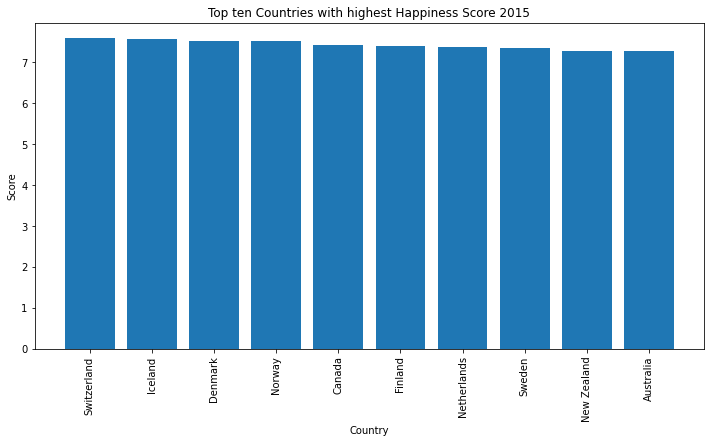

In [62]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2015')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2015['Country'], top10_country_2015['Happiness Score']);

In [63]:
# sns.barplot('Region', 'Happiness Score', data=top10_country_2015)

### Top 10 2016

In [64]:
f_2016 = world_happiness_data[world_happiness_data.Year == 2016]

In [65]:
country_df = f_2016[['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score']]

In [66]:
top10_country_2016 = country_df.sort_values('Happiness Rank', ascending=True).head(10)
top10_country_2016

,Year,Country,Region,Happiness Rank,Happiness Score
158,2016,Denmark,Western Europe,1,7.526
159,2016,Switzerland,Western Europe,2,7.509
160,2016,Iceland,Western Europe,3,7.501
161,2016,Norway,Western Europe,4,7.498
162,2016,Finland,Western Europe,5,7.413
163,2016,Canada,North America,6,7.404
164,2016,Netherlands,Western Europe,7,7.339
165,2016,New Zealand,Australia and New Zealand,8,7.334
166,2016,Australia,Australia and New Zealand,9,7.313
167,2016,Sweden,Western Europe,10,7.291


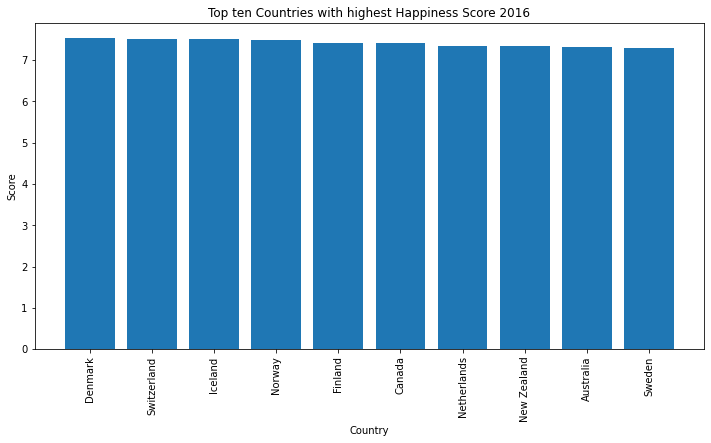

In [67]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2016')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2016['Country'], top10_country_2016['Happiness Score']);

### Top 10 2017

In [68]:
f_2017 = world_happiness_data[world_happiness_data.Year == 2017]

In [69]:
country_df = f_2017[['Year', 'Country', 'Happiness Rank', 'Happiness Score']]

In [70]:
top10_country_2017 = country_df.sort_values('Happiness Rank', ascending=True).head(10)
top10_country_2017

,Year,Country,Happiness Rank,Happiness Score
315,2017,Norway,1,7.537
316,2017,Denmark,2,7.522
317,2017,Iceland,3,7.504
318,2017,Switzerland,4,7.494
319,2017,Finland,5,7.469
320,2017,Netherlands,6,7.377
321,2017,Canada,7,7.316
322,2017,New Zealand,8,7.314
323,2017,Sweden,9,7.284
324,2017,Australia,10,7.284


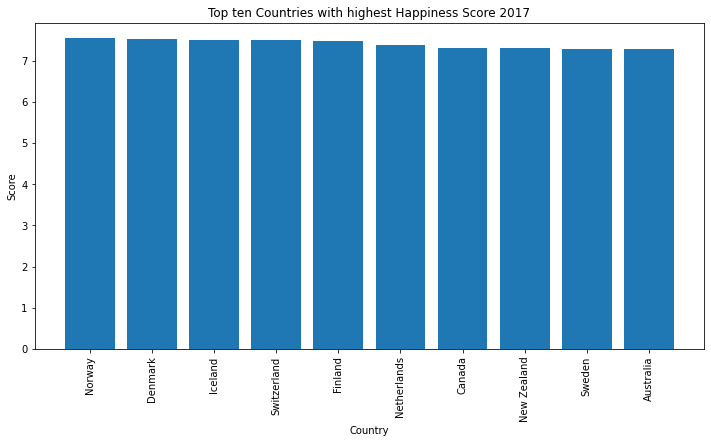

In [71]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2017')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2017['Country'], top10_country_2017['Happiness Score']);

### Top 10 2018

In [72]:
f_2018 = world_happiness_data[world_happiness_data.Year == 2018]

In [73]:
country_df = f_2018[['Year', 'Country', 'Happiness Rank', 'Happiness Score']]

In [74]:
top10_country_2018 = country_df.sort_values('Happiness Rank', ascending=True).head(10)
top10_country_2018

,Year,Country,Happiness Rank,Happiness Score
470,2018,Finland,1,7.632
471,2018,Norway,2,7.594
472,2018,Denmark,3,7.555
473,2018,Iceland,4,7.495
474,2018,Switzerland,5,7.487
475,2018,Netherlands,6,7.441
476,2018,Canada,7,7.328
477,2018,New Zealand,8,7.324
478,2018,Sweden,9,7.314
479,2018,Australia,10,7.272


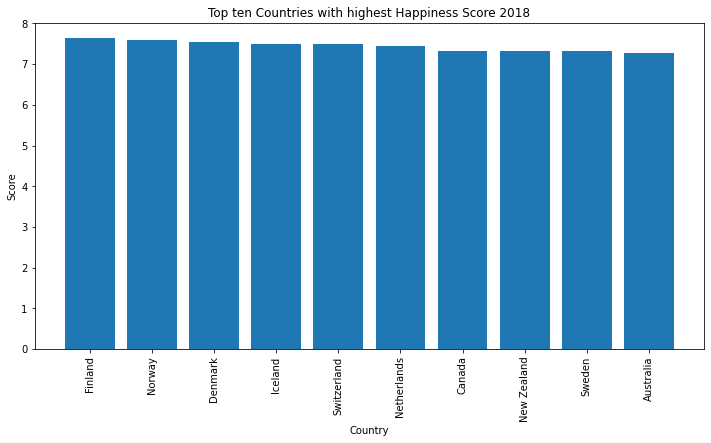

In [75]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2018')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2018['Country'], top10_country_2018['Happiness Score']);

### Top 10 2019

In [76]:
f_2019 = world_happiness_data[world_happiness_data.Year == 2019]

In [77]:
country_df = f_2019[['Year', 'Country', 'Happiness Rank', 'Happiness Score']]

In [78]:
top10_country_2019 = country_df.sort_values('Happiness Rank', ascending=True).head(10)
top10_country_2019

,Year,Country,Happiness Rank,Happiness Score
626,2019,Finland,1,7.769
627,2019,Denmark,2,7.600
628,2019,Norway,3,7.554
629,2019,Iceland,4,7.494
630,2019,Netherlands,5,7.488
631,2019,Switzerland,6,7.480
632,2019,Sweden,7,7.343
633,2019,New Zealand,8,7.307
634,2019,Canada,9,7.278
635,2019,Austria,10,7.246


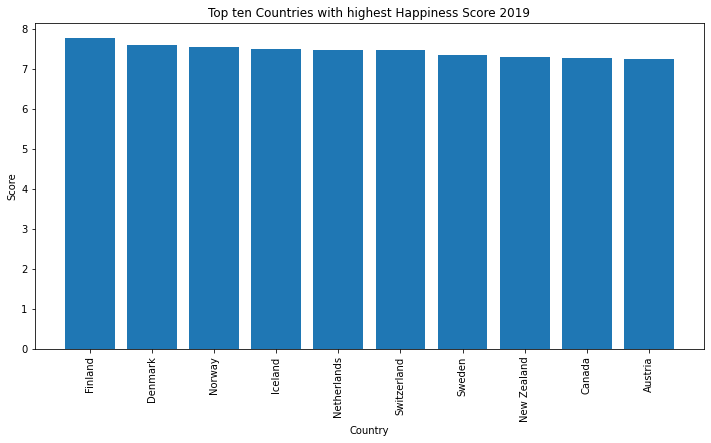

In [79]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2019')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2019['Country'], top10_country_2019['Happiness Score']);

### Top 10 2020

In [80]:
f_2020 = world_happiness_data[world_happiness_data.Year == 2020]

In [81]:
country_df = f_2020[['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score']]

In [82]:
top10_country_2020 = country_df.sort_values('Happiness Rank', ascending=True).head(10)
top10_country_2020

,Year,Country,Region,Happiness Rank,Happiness Score
782,2020,Finland,Western Europe,1,7.8087
783,2020,Denmark,Western Europe,2,7.6456
784,2020,Switzerland,Western Europe,3,7.5599
785,2020,Iceland,Western Europe,4,7.5045
786,2020,Norway,Western Europe,5,7.4880
787,2020,Netherlands,Western Europe,6,7.4489
788,2020,Sweden,Western Europe,7,7.3535
789,2020,New Zealand,North America and ANZ,8,7.2996
790,2020,Austria,Western Europe,9,7.2942
791,2020,Luxembourg,Western Europe,10,7.2375


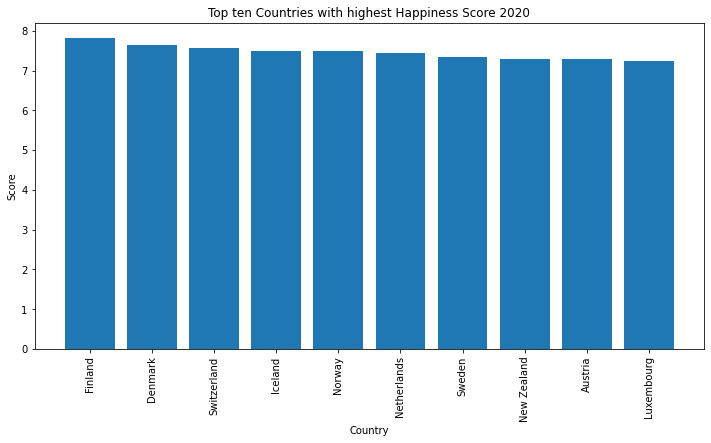

In [83]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2020')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2020['Country'], top10_country_2020['Happiness Score']);

### Top 10 2021

In [84]:
f_2021 = world_happiness_data[world_happiness_data.Year == 2021]

In [85]:
country_df = f_2021[['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score']]

In [86]:
top10_country_2021 = country_df.sort_values('Happiness Rank', ascending=True).head(10)
top10_country_2021

,Year,Country,Region,Happiness Rank,Happiness Score
935,2021,Finland,Western Europe,1,7.842
936,2021,Denmark,Western Europe,2,7.620
937,2021,Switzerland,Western Europe,3,7.571
938,2021,Iceland,Western Europe,4,7.554
939,2021,Netherlands,Western Europe,5,7.464
940,2021,Norway,Western Europe,6,7.392
941,2021,Sweden,Western Europe,7,7.363
942,2021,Luxembourg,Western Europe,8,7.324
943,2021,New Zealand,North America and ANZ,9,7.277
944,2021,Austria,Western Europe,10,7.268


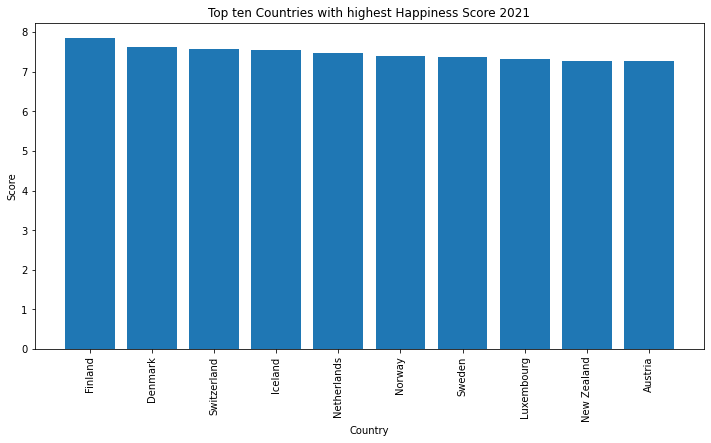

In [87]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2021')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2021['Country'], top10_country_2021['Happiness Score']);

### Top 10 2022

In [88]:
f_2022 = world_happiness_data[world_happiness_data.Year == 2022]

In [89]:
country_df = f_2022[['Year', 'Country', 'Happiness Rank', 'Happiness Score']]

In [90]:
top10_country_2022 = country_df.sort_values('Happiness Rank', ascending=True).head(10)
top10_country_2022

,Year,Country,Happiness Rank,Happiness Score
1084,2022,Finland,1,7.821
1085,2022,Denmark,2,7.636
1086,2022,Iceland,3,7.557
1087,2022,Switzerland,4,7.512
1088,2022,Netherlands,5,7.415
1089,2022,Luxembourg,6,7.404
1090,2022,Sweden,7,7.384
1091,2022,Norway,8,7.365
1092,2022,Israel,9,7.364
1093,2022,New Zealand,10,7.200


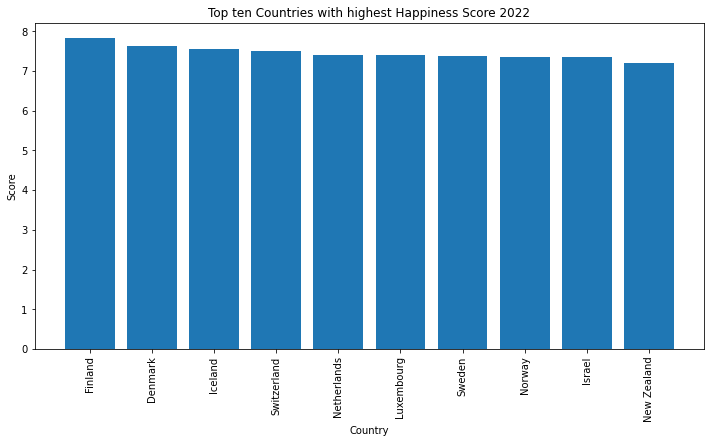

In [91]:
plt.figure(figsize=(12, 6))
plt.title('Top ten Countries with highest Happiness Score 2022')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top10_country_2022['Country'], top10_country_2022['Happiness Score']);

### Top 5 Country 2015-2022

In [92]:
top_country = world_happiness_data[['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score']]

In [93]:
top5_country = top_country.sort_values(['Happiness Score', 'Year'], ascending=False).head(5)
top5_country

,Year,Country,Region,Happiness Rank,Happiness Score
935,2021,Finland,Western Europe,1,7.8420
1084,2022,Finland,NaN,1,7.8210
782,2020,Finland,Western Europe,1,7.8087
626,2019,Finland,NaN,1,7.7690
783,2020,Denmark,Western Europe,2,7.6456


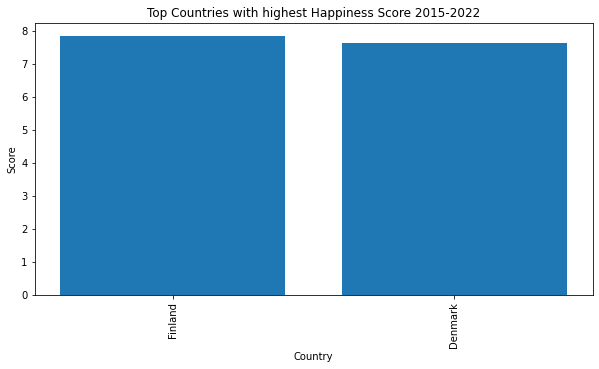

In [94]:
plt.figure(figsize=(10, 5))
plt.title('Top Countries with highest Happiness Score 2015-2022')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.bar(top5_country['Country'], top5_country['Happiness Score']);

### Top 5 Years

In [95]:
top_year = world_happiness_data[['Year', 'Happiness Rank', 'Happiness Score']]

In [96]:
pd.DataFrame(top_year)

,Year,Happiness Rank,Happiness Score
0,2015,1,7.587
1,2015,2,7.561
2,2015,3,7.527
3,2015,4,7.522
4,2015,5,7.427
...,...,...,...
1225,2022,142,3.471
1226,2022,143,3.268
1227,2022,144,2.995
1228,2022,145,2.955


In [97]:
top5_year = top_year.sort_values('Happiness Rank', ascending=True).head(8)
t = top5_year.sort_values(by='Year')
t

,Year,Happiness Rank,Happiness Score
0,2015,1,7.5870
158,2016,1,7.5260
315,2017,1,7.5370
470,2018,1,7.6320
626,2019,1,7.7690
782,2020,1,7.8087
935,2021,1,7.8420
1084,2022,1,7.8210


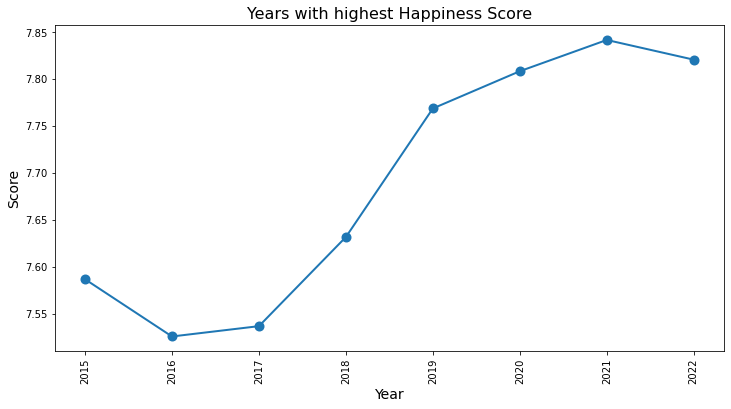

In [98]:
plt.figure(figsize=(12, 6))
plt.title('Years with highest Happiness Score', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Score', size=14)
plt.xticks(rotation=90)
plt.plot(t['Year'], t['Happiness Score'], 'o-', lw=2, ms=8, mew=2);

### Heallth vs Happiness Score by Year, Region and Country

In [99]:
# Total Healthy(life expectancy) compared to the Happiness Score by year
health = world_happiness_data[['Year','Country','Happiness Score','Health']]

In [100]:
pd.DataFrame(health)

,Year,Country,Happiness Score,Health
0,2015,Switzerland,7.587,0.94143
1,2015,Iceland,7.561,0.94784
2,2015,Denmark,7.527,0.87464
3,2015,Norway,7.522,0.88521
4,2015,Canada,7.427,0.90563
...,...,...,...,...
1225,2022,Botswana,3.471,NaN
1226,2022,Rwanda,3.268,NaN
1227,2022,Zimbabwe,2.995,NaN
1228,2022,Lebanon,2.955,NaN


In [101]:
sns.set_style("darkgrid")

In [102]:
h_5 = health[world_happiness_data.Year == 2015]
h_2015 = h_5.sort_values(by='Country')

h_6 = health[world_happiness_data.Year == 2016]
h_2016 = h_6.sort_values(by='Country')

h_7 = health[world_happiness_data.Year == 2017]
h_2017 = h_7.sort_values(by='Country')

h_8 = health[world_happiness_data.Year == 2018]
h_2018 = h_8.sort_values(by='Country')

h_9 = health[world_happiness_data.Year == 2019]
h_2019 = h_9.sort_values(by='Country')

h_20 = health[world_happiness_data.Year == 2020]
h_2020 = h_20.sort_values(by='Country')

h_21 = health[world_happiness_data.Year == 2021]
h_2021 = h_21.sort_values(by='Country')

h_22 = health[world_happiness_data.Year == 2022]
h_2022 = h_22.sort_values(by='Country')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\l

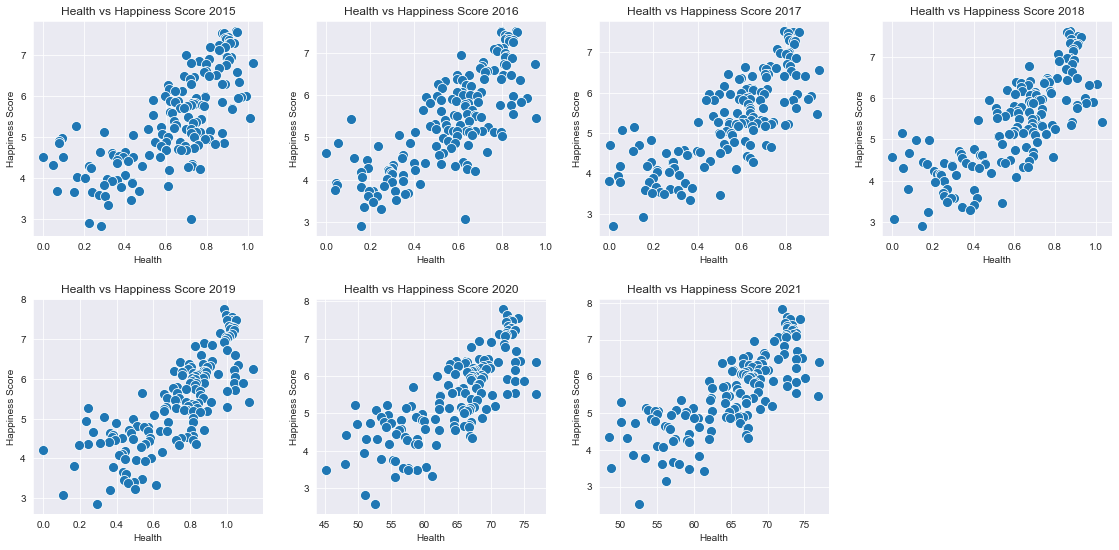

In [103]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))


axes[0,0].set_title('Health vs Happiness Score 2015')
sns.scatterplot(h_5['Health'], h_5['Happiness Score'], s=100, ax=axes[0,0]);

axes[0,1].set_title('Health vs Happiness Score 2016')
sns.scatterplot(h_6['Health'], h_6['Happiness Score'], s=100, ax=axes[0,1]);

axes[0,2].set_title('Health vs Happiness Score 2017')
sns.scatterplot(h_7['Health'], h_7['Happiness Score'], s=100, ax=axes[0,2]);

axes[0,3].set_title('Health vs Happiness Score 2018')
sns.scatterplot(h_8['Health'], h_8['Happiness Score'], s=100, ax=axes[0,3]);

axes[1,0].set_title('Health vs Happiness Score 2019')
sns.scatterplot(h_9['Health'], h_9['Happiness Score'], s=100, ax=axes[1,0]);

axes[1,1].set_title('Health vs Happiness Score 2020')
sns.scatterplot(h_20['Health'], h_20['Happiness Score'], s=100, ax=axes[1,1]);

axes[1,2].set_title('Health vs Happiness Score 2021')
sns.scatterplot(h_21['Health'], h_21['Happiness Score'], s=100, ax=axes[1,2]);

plt.tight_layout(pad=2)
fig.delaxes(axes[1][3])

In [86]:
# Health(life expectancy) compared to Happiness Score 2015-2022 by Country
ch = world_happiness_data.groupby('Year')[['Country','Happiness Score','Health']].sum()
ch

,Happiness Score,Health
Year,,
2015,849.366000,99.580980
2016,845.003000,87.546180
2017,829.873000,85.457821
2018,838.643000,93.186000
2019,843.507000,113.138000
2020,837.405699,9860.165962
2021,824.393000,9683.927000
2022,810.822000,0.000000


In [87]:
pd.DataFrame(ch)

,Happiness Score,Health
Year,,
2015,849.366000,99.580980
2016,845.003000,87.546180
2017,829.873000,85.457821
2018,838.643000,93.186000
2019,843.507000,113.138000
2020,837.405699,9860.165962
2021,824.393000,9683.927000
2022,810.822000,0.000000


In [88]:
chb = ch.reset_index().sort_values(['Health'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


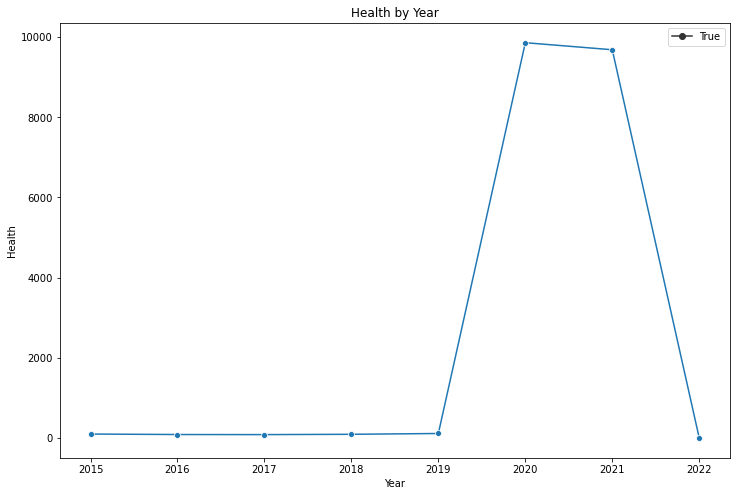

In [89]:
plt.figure(figsize=(12, 8))
plt.title('Health by Year')

sns.lineplot(chb['Year'], 
                chb['Health'],
                style=True, markers='o');

In [108]:
# Health(life expectancy) compared to Happiness Score by Region, Year
region_health = world_happiness_data.groupby('Region')[['Happiness Score','Health']].sum()
pd.DataFrame(region_health)
r = region_health.reset_index().sort_values('Health', ascending=False)
# r

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


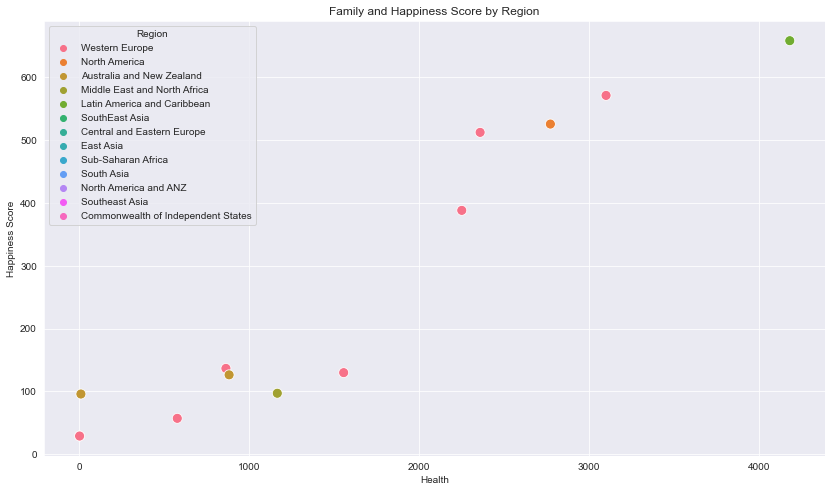

In [109]:
plt.figure(figsize=(14, 8))
plt.title('Family and Happiness Score by Region')

sns.scatterplot(r['Health'], 
                r['Happiness Score'], 
                hue=world_happiness_data.Region,
                s=100);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


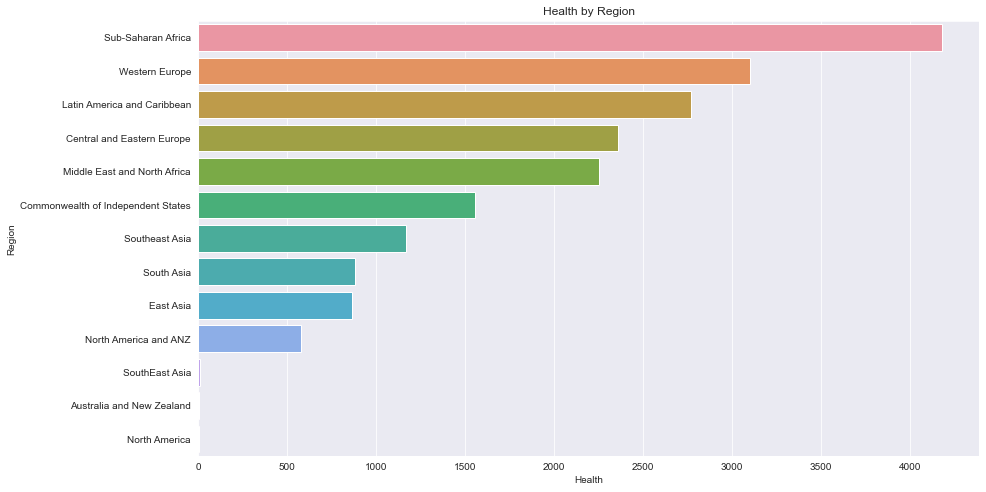

In [110]:
plt.figure(figsize=(14, 8))
plt.title('Health by Region')

sns.barplot(r['Health'], 
                r['Region']);
#                 hue=world_happiness_data.Region,);

In [111]:
r = region_health.reset_index().sort_values("Health", ascending=False)

### Family vs Happiness Score by Year, Region and Country

In [112]:
# Health(life expectancy) compared to Happiness Score 2015-2022 by Country
family = world_happiness_data.groupby('Year')[['Country','Happiness Score','Family']].sum()
family

,Happiness Score,Family
Year,,
2015,849.366000,156.585260
2016,845.003000,124.598510
2017,829.873000,184.279151
2018,838.643000,0.000000
2019,843.507000,0.000000
2020,837.405699,0.000000
2021,824.393000,0.000000
2022,810.822000,0.000000


In [113]:
pd.DataFrame(family)

,Happiness Score,Family
Year,,
2015,849.366000,156.585260
2016,845.003000,124.598510
2017,829.873000,184.279151
2018,838.643000,0.000000
2019,843.507000,0.000000
2020,837.405699,0.000000
2021,824.393000,0.000000
2022,810.822000,0.000000


In [114]:
fb = family.reset_index().sort_values(['Family'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


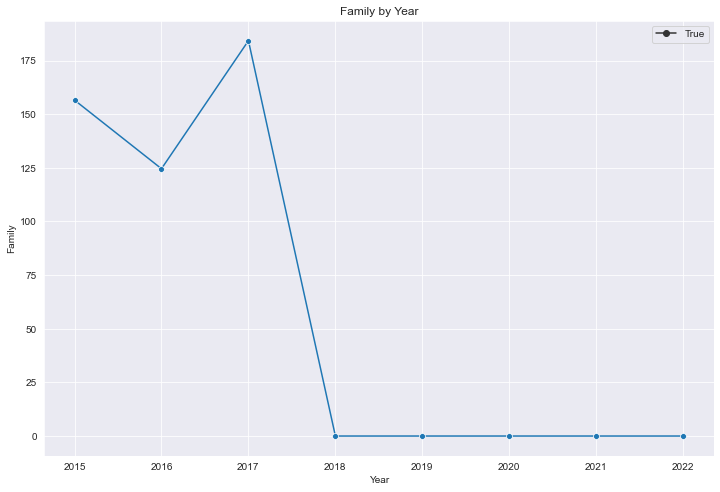

In [115]:
plt.figure(figsize=(12, 8))
plt.title('Family by Year')

sns.lineplot('Year', 
                'Family',
                style=True, markers='o',
            data=fb);

In [116]:
# Health(life expectancy) compared to Happiness Score by Region, Year
region_family = world_happiness_data.groupby('Region')[['Happiness Score','Family']].sum()

In [117]:
# FYI the region column only appears in the 2015, 2016, 2020 and 2021 data that is why it is are the only

In [118]:
pd.DataFrame(region_family)

,Happiness Score,Family
Region,,
Australia and New Zealand,29.217000,4.90644
Central and Eastern Europe,512.170900,55.53203
Commonwealth of Independent States,129.904099,0.00000
East Asia,136.653100,12.05913
Latin America and Caribbean,525.403500,45.86622
Middle East and North Africa,388.070701,31.62704
North America,29.054000,4.71364
North America and ANZ,57.208100,0.00000
South Asia,126.430099,7.88211


In [119]:
rf = region_family.reset_index().sort_values("Family", ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


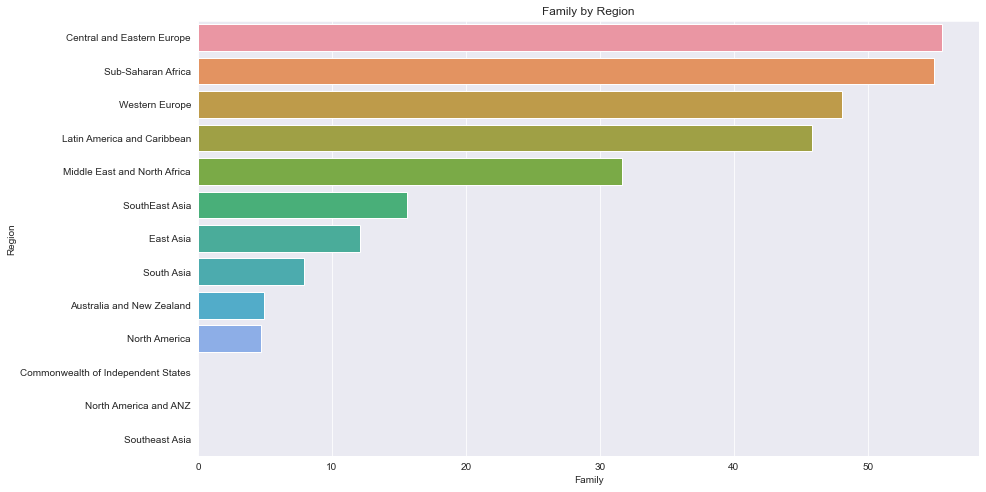

In [120]:
plt.figure(figsize=(14, 8))
plt.title('Family by Region')

sns.barplot(rf['Family'], 
            rf['Region']);
#                 hue=world_happiness_data.Region,);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


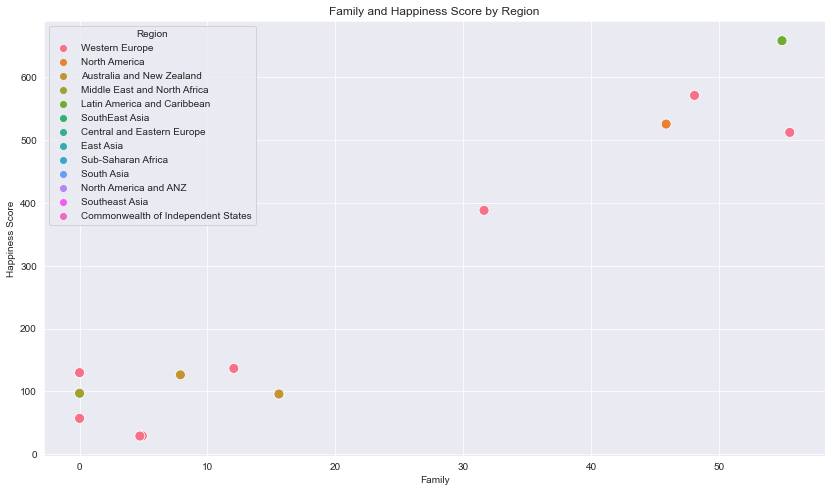

In [121]:
plt.figure(figsize=(14, 8))
plt.title('Family and Happiness Score by Region')

sns.scatterplot('Family', 
                'Happiness Score', 
                hue=world_happiness_data.Region,
                data=rf,
                s=100);

In [122]:
# Family compared to Happiness Score by Country, Year
country_family = world_happiness_data[['Country','Happiness Score','Family']]

In [123]:
pd.DataFrame(country_family)

,Country,Happiness Score,Family
0,Switzerland,7.587,1.34951
1,Iceland,7.561,1.40223
2,Denmark,7.527,1.36058
3,Norway,7.522,1.33095
4,Canada,7.427,1.32261
...,...,...,...
1225,Botswana,3.471,NaN
1226,Rwanda,3.268,NaN
1227,Zimbabwe,2.995,NaN
1228,Lebanon,2.955,NaN


In [124]:
country_family.sort_values("Family", ascending=False)

,Country,Happiness Score,Family
317,Iceland,7.504,1.610574
329,Ireland,6.977,1.558231
316,Denmark,7.522,1.551122
361,Uzbekistan,5.971,1.548969
322,New Zealand,7.314,1.548195
...,...,...,...
1225,Botswana,3.471,NaN
1226,Rwanda,3.268,NaN
1227,Zimbabwe,2.995,NaN
1228,Lebanon,2.955,NaN


### Family vs Health by Year

In [125]:
# Family compared to Health by Year
fh = world_happiness_data.groupby('Year')[['Family','Health']].sum()

In [126]:
pd.DataFrame(fh)

,Family,Health
Year,,
2015,156.585260,99.580980
2016,124.598510,87.546180
2017,184.279151,85.457821
2018,0.000000,93.186000
2019,0.000000,113.138000
2020,0.000000,9860.165962
2021,0.000000,9683.927000
2022,0.000000,0.000000


In [127]:
fhb = fh.reset_index().sort_values(['Family', 'Health'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


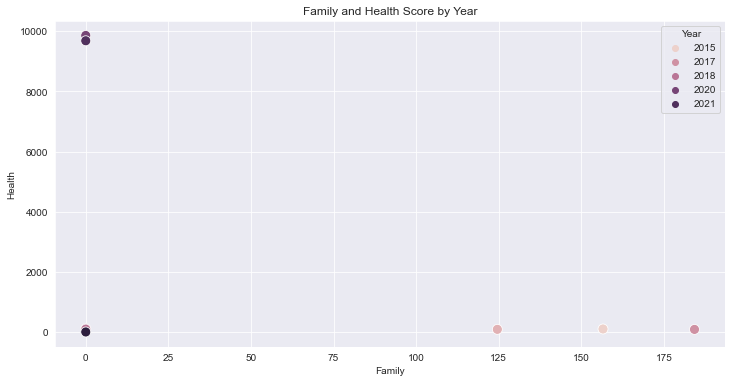

In [128]:
plt.figure(figsize=(12, 6))
plt.title('Family and Health Score by Year')

sns.scatterplot(fhb['Family'], 
                fhb['Health'], 
                hue=fhb.Year,
#                 palette='deep',
#                 size=world_happiness_data.Year,
                s=100);

### GDP vs Happiness Year, Region and Country

In [129]:
# GDP compared to Happiness Score by Year
gdp = world_happiness_data.groupby('Year')[['Happiness Score','Economy (GDP per Capita)']].sum()

In [130]:
pd.DataFrame(gdp)

,Happiness Score,Economy (GDP per Capita)
Year,,
2015,849.366000,133.689680
2016,845.003000,149.759130
2017,829.873000,152.631321
2018,838.643000,139.066000
2019,843.507000,141.203000
2020,837.405699,0.000000
2021,824.393000,0.000000
2022,810.822000,0.000000


In [131]:
gb = gdp.reset_index().sort_values(['Economy (GDP per Capita)'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


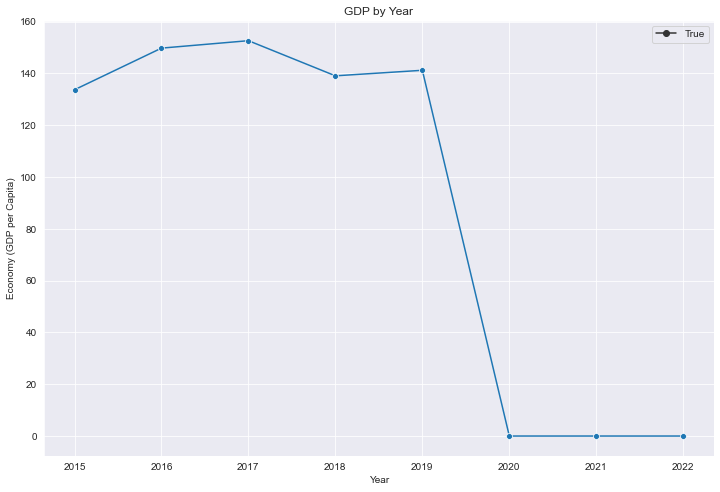

In [132]:
plt.figure(figsize=(12, 8))
plt.title('GDP by Year')

r = sns.lineplot(gb['Year'], 
                gb['Economy (GDP per Capita)'],
                style=True, markers='o');

In [133]:
sns.lineplot?

In [134]:
# GDP compared to Happiness Score by Country
country_gdp = world_happiness_data.groupby('Country')[['Happiness Score','Economy (GDP per Capita)']].sum()

In [135]:
pd.DataFrame(country_gdp)

,Happiness Score,Economy (GDP per Capita)
Country,,
Afghanistan,25.0579,1.785567
Albania,38.7617,4.693163
Algeria,43.3521,5.064814
Angola,15.4890,3.193518
Argentina,50.1677,5.555175
...,...,...
Venezuela,42.5272,5.262341
Vietnam,42.0225,3.617078
Yemen,29.5114,2.446563


In [136]:
cg = country_gdp.reset_index().sort_values('Economy (GDP per Capita)')

In [137]:
h_score = (country_gdp['Happiness Score'] / country_gdp['Happiness Score'].sum() * 100)

In [138]:
g_econ = (country_gdp['Economy (GDP per Capita)'] / country_gdp['Economy (GDP per Capita)'].sum() * 100)

In [139]:
country_gdp['% Economy'] = h_score + g_econ

In [140]:
country_gdp

,Happiness Score,Economy (GDP per Capita),% Economy
Country,,,
Afghanistan,25.0579,1.785567,0.624433
Albania,38.7617,4.693163,1.235501
Algeria,43.3521,5.064814,1.356111
Angola,15.4890,3.193518,0.677710
Argentina,50.1677,5.555175,1.526609
...,...,...,...
Venezuela,42.5272,5.262341,1.371334
Vietnam,42.0225,3.617078,1.134105
Yemen,29.5114,2.446563,0.783385


In [141]:
# Economy (GDP per Capita) compared to Happiness Score by Region
region_gdp = world_happiness_data.groupby('Region')[['Happiness Score','Economy (GDP per Capita)']].sum()

In [142]:
pd.DataFrame(region_gdp)

,Happiness Score,Economy (GDP per Capita)
Region,,
Australia and New Zealand,29.217000,5.38885
Central and Eastern Europe,512.170900,57.70928
Commonwealth of Independent States,129.904099,0.00000
East Asia,136.653100,14.57455
Latin America and Caribbean,525.403500,43.13178
Middle East and North Africa,388.070701,42.98661
North America,29.054000,5.66891
North America and ANZ,57.208100,0.00000
South Asia,126.430099,8.54810


In [143]:
rgb = region_gdp.reset_index().sort_values('Economy (GDP per Capita)', ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


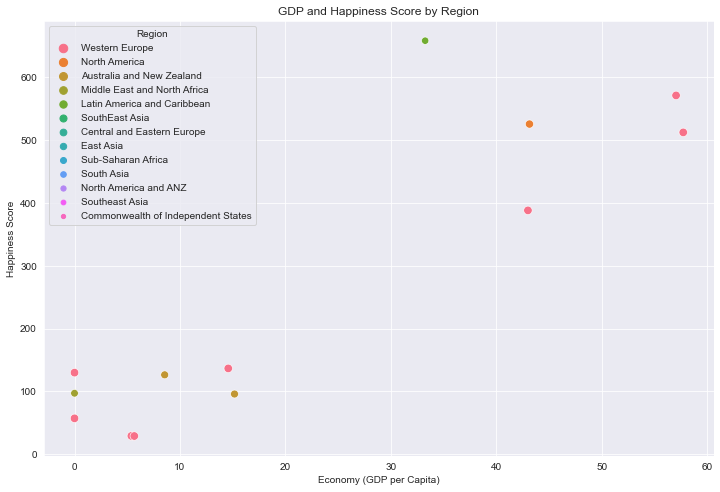

In [144]:
# plt.bar(region_gdp['Region'], region_gdp['Economy (GDP per Capita)']);
# plt.legend(world_happiness_data.Region);
# sns.set()
# sns.barplot('Year', 'Economy (GDP per Capita)', hue='Region', data=world_happiness_data);
# world_happiness_data.set_index('Region').T.plot(kind='bregion_gdp.Region)
# region
plt.figure(figsize=(12, 8))
plt.title('GDP and Happiness Score by Region')

r = sns.scatterplot(rgb['Economy (GDP per Capita)'], 
                rgb['Happiness Score'],
                hue=world_happiness_data.Region,
#                 palette='deep',
                size=world_happiness_data.Region,
                s=100);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


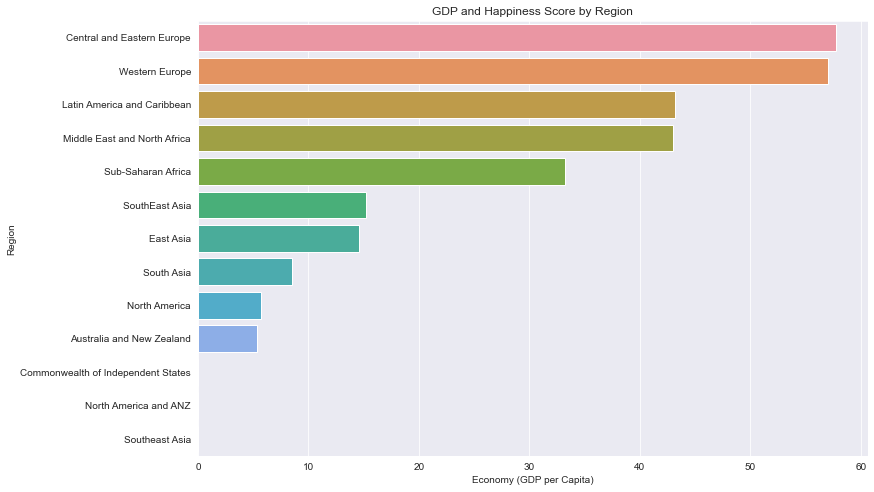

In [145]:
plt.figure(figsize=(12, 8))
plt.title('GDP and Happiness Score by Region')

r = sns.barplot(rgb['Economy (GDP per Capita)'], 
                rgb['Region'],
#                 hue=world_happiness_data.Region,
#                 palette='deep',
#                 size=world_happiness_data.Region,
                );

In [146]:
# plt.figure(figsize=(12, 6))
# plt.title('Economy (GDP per Capita) by Region' , size=16)
# plt.xlabel('Region', size=14)
# plt.ylabel('Economy (GDP per Capita)', size=14)
# plt.xticks(rotation=90)
# plt.bar(rgb['Region'], rgb['Economy (GDP per Capita)']);

In [147]:
# Percentage of GDP compared to Happiness Score
h_score = (region_gdp['Happiness Score'] / region_gdp['Happiness Score'].sum() * 100)

In [148]:
g_econ = (region_gdp['Economy (GDP per Capita)'] / region_gdp['Economy (GDP per Capita)'].sum() * 100)

In [149]:
region_gdp['% Economy'] = h_score + g_econ

In [150]:
region_gdp

,Happiness Score,Economy (GDP per Capita),% Economy
Region,,,
Australia and New Zealand,29.217000,5.38885,2.771719
Central and Eastern Europe,512.170900,57.70928,35.620271
Commonwealth of Independent States,129.904099,0.00000,3.870608
East Asia,136.653100,14.57455,9.213564
Latin America and Caribbean,525.403500,43.13178,30.871644
Middle East and North Africa,388.070701,42.98661,26.728475
North America,29.054000,5.66891,2.865666
North America and ANZ,57.208100,0.00000,1.704566
South Asia,126.430099,8.54810,6.782845


In [151]:
region_gdp.agg(['sum'])

,Happiness Score,Economy (GDP per Capita),% Economy
sum,3356.167699,283.44881,200.0


### Economy and Health by Region and Country

In [152]:
# Region
health_gdp = world_happiness_data.groupby('Region')[['Economy (GDP per Capita)', 'Health']].sum()

In [153]:
pd.DataFrame(health_gdp)

,Economy (GDP per Capita),Health
Region,,
Australia and New Zealand,5.38885,3.522090
Central and Eastern Europe,57.70928,2359.446405
Commonwealth of Independent States,0.00000,1556.832697
East Asia,14.57455,864.186490
Latin America and Caribbean,43.13178,2772.774906
Middle East and North Africa,42.98661,2251.511020
North America,5.66891,3.374020
North America and ANZ,0.00000,578.008267
South Asia,8.54810,882.869133


In [154]:
hb = health_gdp.reset_index().sort_values(['Economy (GDP per Capita)', 'Health'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


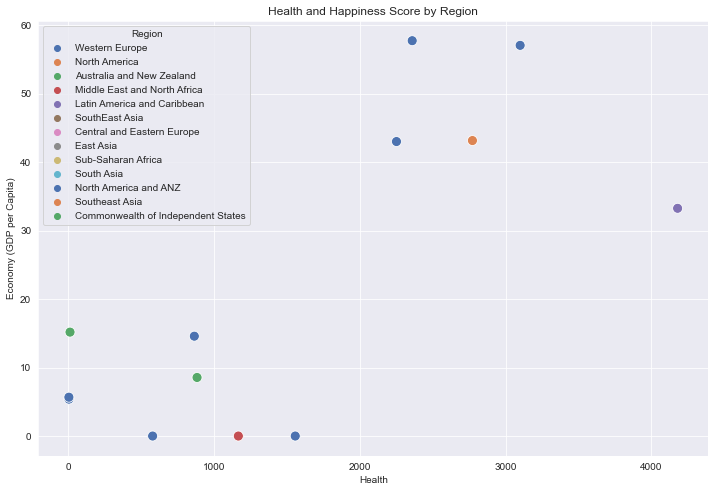

In [155]:
plt.figure(figsize=(12, 8))
plt.title('Health and Happiness Score by Region')

sns.scatterplot(hb['Health'], 
                hb['Economy (GDP per Capita)'],
                hue=world_happiness_data.Region,
                palette='deep',
#                 size=world_happiness_data.Region,
                s=100);

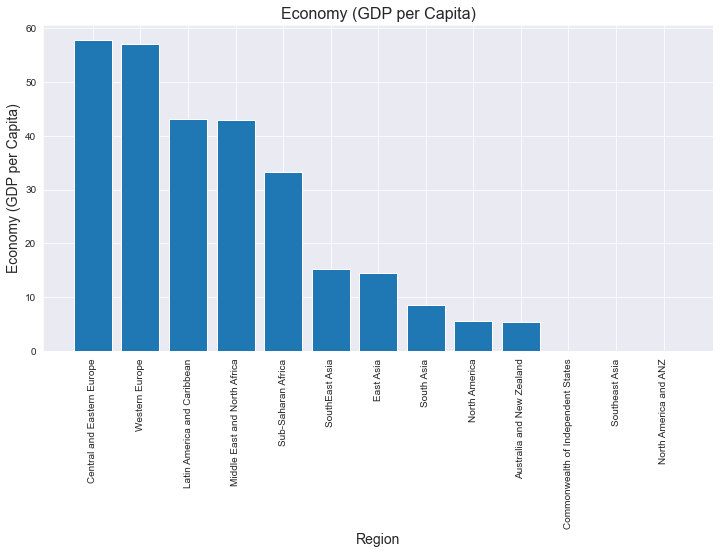

In [156]:
plt.figure(figsize=(12, 6))
plt.title('Economy (GDP per Capita)', size=16)
plt.xlabel('Region', size=14)
plt.ylabel('Economy (GDP per Capita)', size=14)
plt.xticks(rotation=90)
plt.bar(hb['Region'], hb['Economy (GDP per Capita)']);

In [157]:
# Percentage of GDP compared to health by region
health = (health_gdp['Health'] / health_gdp['Health'].sum() * 100)

In [158]:
economy = (health_gdp['Economy (GDP per Capita)'] / health_gdp['Economy (GDP per Capita)'].sum() * 100)

In [159]:
health_gdp['% Economy/Health'] = health + economy

In [160]:
health_gdp

,Economy (GDP per Capita),Health,% Economy/Health
Region,,,
Australia and New Zealand,5.38885,3.522090,1.919023
Central and Eastern Europe,57.70928,2359.446405,32.317618
Commonwealth of Independent States,0.00000,1556.832697,7.890200
East Asia,14.57455,864.186490,9.521656
Latin America and Caribbean,43.13178,2772.774906,29.269508
Middle East and North Africa,42.98661,2251.511020,26.576470
North America,5.66891,3.374020,2.017077
North America and ANZ,0.00000,578.008267,2.929410
South Asia,8.54810,882.869133,7.490226


In [161]:
health_gdp.agg(['sum'])

,Economy (GDP per Capita),Health,% Economy/Health
sum,283.44881,19731.220122,200.0


In [162]:
# Country
c_health_gdp = world_happiness_data.groupby(['Country'])[['Economy (GDP per Capita)', 'Health']].sum()

In [163]:
pd.DataFrame(c_health_gdp)

,Economy (GDP per Capita),Health
Country,,
Afghanistan,1.785567,106.356537
Albania,4.693163,141.645617
Algeria,5.064814,135.235459
Angola,3.193518,0.535609
Argentina,5.555175,141.608280
...,...,...
Venezuela,5.262341,136.624045
Vietnam,3.617078,139.600235
Yemen,2.446563,115.676484


In [164]:
c_health_gdp.sort_values(['Economy (GDP per Capita)', 'Health'], ascending=False)

,Economy (GDP per Capita),Health
Country,,
Qatar,8.718456,3.843658
United Arab Emirates,8.226133,138.176765
Luxembourg,8.188374,149.717448
Singapore,7.960688,158.828513
Kuwait,7.778312,137.143362
...,...,...
Hong Kong S.A.R. of China,0.000000,153.591706
Maldives,0.000000,141.199998
Congo,0.000000,0.000000


In [165]:
# Percentage of GDP compared to health by country
c_health = (c_health_gdp['Health'] / c_health_gdp['Health'].sum() * 100)

In [166]:
c_gdp = (c_health_gdp['Economy (GDP per Capita)'] / c_health_gdp['Economy (GDP per Capita)'].sum() * 100)

In [167]:
c_health_gdp['% Economy/Health'] = c_health + c_gdp

In [168]:
c_health_gdp

,Economy (GDP per Capita),Health,% Economy/Health
Country,,,
Afghanistan,1.785567,106.356537,0.780431
Albania,4.693163,141.645617,1.362565
Algeria,5.064814,135.235459,1.382432
Angola,3.193518,0.535609,0.448480
Argentina,5.555175,141.608280,1.482712
...,...,...,...
Venezuela,5.262341,136.624045,1.416941
Vietnam,3.617078,139.600235,1.202132
Yemen,2.446563,115.676484,0.919250


### Generosity vs Happiness Year, Region and Country

In [169]:
# Generosity compared to Happiness Score by Year
gen = world_happiness_data.groupby(['Year'])[['Happiness Score','Generosity']].sum()

In [170]:
pd.DataFrame(gen)

,Happiness Score,Generosity
Year,,
2015,849.366000,37.492690
2016,845.003000,38.093680
2017,829.873000,38.266938
2018,838.643000,28.237000
2019,843.507000,28.836000
2020,837.405699,-2.228951
2021,824.393000,-2.255000
2022,810.822000,0.000000


In [171]:
gen = gen.sort_values(['Generosity'], ascending=False)
genb = gen.reset_index().sort_values('Generosity', ascending=False)

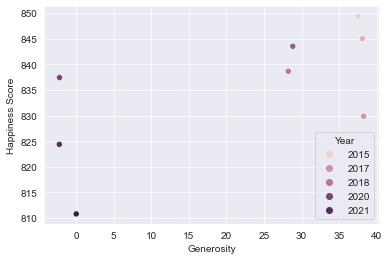

In [172]:
sns.scatterplot(x="Generosity",
           y="Happiness Score",
           hue="Year",
           data=genb);

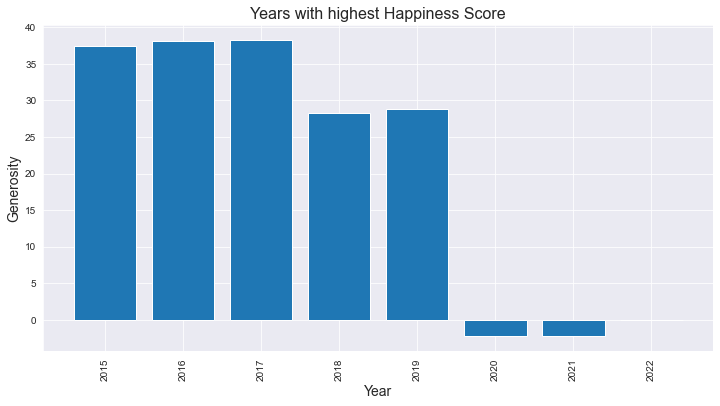

In [173]:
plt.figure(figsize=(12, 6))
plt.title('Years with highest Happiness Score', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Generosity', size=14)
plt.xticks(rotation=90)
plt.bar(genb['Year'], genb['Generosity']);

In [174]:
# Country
c_gen = world_happiness_data.groupby(['Country'])[['Happiness Score', 'Generosity']].sum()

In [175]:
pd.DataFrame(c_gen)

,Happiness Score,Generosity
Country,,
Afghanistan,25.0579,1.140222
Albania,38.7617,0.767123
Algeria,43.3521,0.157991
Angola,15.4890,0.421076
Argentina,50.1677,0.084943
...,...,...
Venezuela,42.5272,-0.052161
Vietnam,42.0225,0.785785
Yemen,29.5114,0.179910


In [176]:
# Region
r_gen = world_happiness_data.groupby(['Region'])[['Happiness Score', 'Generosity']].sum()

In [177]:
pd.DataFrame(r_gen)

,Happiness Score,Generosity
Region,,
Australia and New Zealand,29.217000,1.878710
Central and Eastern Europe,512.170900,6.283570
Commonwealth of Independent States,129.904099,-0.927417
East Asia,136.653100,2.010825
Latin America and Caribbean,525.403500,6.929683
Middle East and North Africa,388.070701,4.564490
North America,29.054000,1.718270
North America and ANZ,57.208100,1.136721
South Asia,126.430099,5.337711


In [178]:
r_gen = r_gen.sort_values(['Generosity'], ascending=False)
r_genb = r_gen.reset_index().sort_values('Generosity', ascending=False)

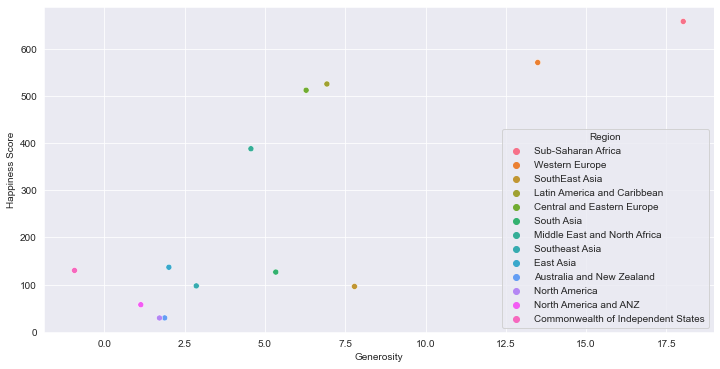

In [179]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="Generosity",
           y="Happiness Score",
           hue="Region",
           data=r_genb);

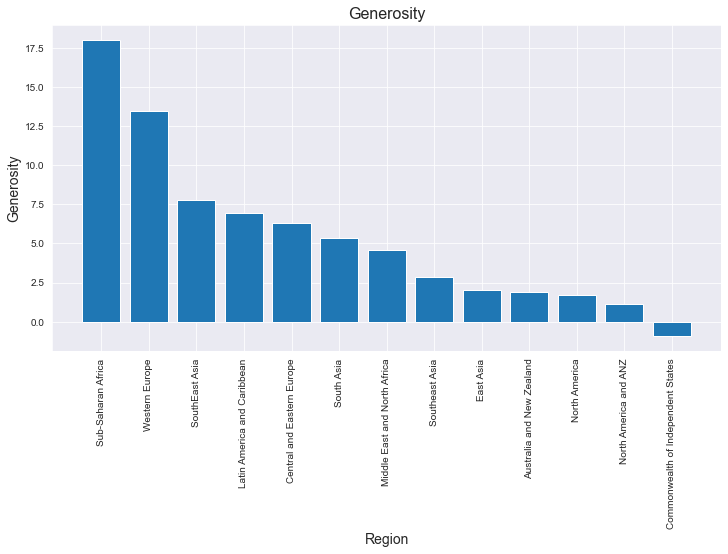

In [180]:
plt.figure(figsize=(12, 6))
plt.title('Generosity', size=16)
plt.xlabel('Region', size=14)
plt.ylabel('Generosity', size=14)
plt.xticks(rotation=90)
plt.bar(r_genb['Region'], r_genb['Generosity']);

In [181]:
r_gen.sort_values(['Generosity'], ascending=False)

,Happiness Score,Generosity
Region,,
Sub-Saharan Africa,658.053300,18.023651
Western Europe,570.977600,13.493677
SouthEast Asia,95.907000,7.788700
Latin America and Caribbean,525.403500,6.929683
Central and Eastern Europe,512.170900,6.283570
South Asia,126.430099,5.337711
Middle East and North Africa,388.070701,4.564490
Southeast Asia,97.118300,2.863828
East Asia,136.653100,2.010825


### Freedom vs Happiness Year, Region and Country

In [182]:
# Freedom compared to Happiness Score by Year
freedom = world_happiness_data.groupby(['Year'])[['Happiness Score','Freedom']].sum()

In [183]:
pd.DataFrame(freedom)

,Happiness Score,Freedom
Year,,
2015,849.366000,67.721160
2016,845.003000,58.246040
2017,829.873000,63.361826
2018,838.643000,70.903000
2019,843.507000,61.241000
2020,837.405699,119.854106
2021,824.393000,117.948000
2022,810.822000,0.000000


In [184]:
free = freedom.sort_values(['Freedom'], ascending=False)
fb = free.reset_index()

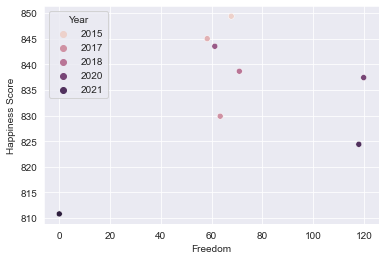

In [185]:
sns.scatterplot(x="Freedom",
           y="Happiness Score",
           hue="Year",
           data=fb);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


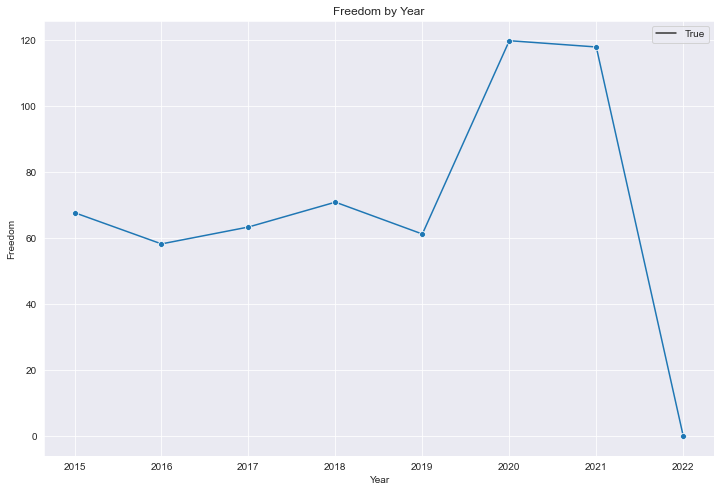

In [186]:
plt.figure(figsize=(12, 8))
plt.title('Freedom by Year')

r = sns.lineplot(fb['Year'], 
                fb['Freedom'],
                style=True, marker='o');

In [187]:
r_freedom = world_happiness_data.groupby(['Region'])[['Happiness Score', 'Freedom']].sum()

In [188]:
pd.DataFrame(r_freedom)

,Happiness Score,Freedom
Region,,
Australia and New Zealand,29.217000,2.440460
Central and Eastern Europe,512.170900,45.749717
Commonwealth of Independent States,129.904099,19.211046
East Asia,136.653100,14.245790
Latin America and Caribbean,525.403500,55.357136
Middle East and North Africa,388.070701,37.373529
North America,29.054000,2.234340
North America and ANZ,57.208100,7.223182
South Asia,126.430099,15.821178


In [189]:
r_freedom = r_freedom.sort_values(['Freedom'], ascending=False)
rfb = r_freedom.reset_index()

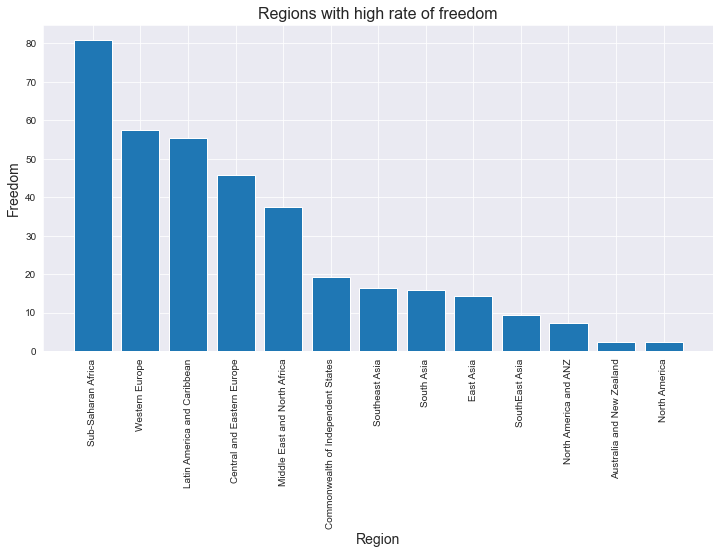

In [190]:
plt.figure(figsize=(12, 6))
plt.title('Regions with high rate of freedom', size=16)
plt.xlabel('Region', size=14)
plt.ylabel('Freedom', size=14)
plt.xticks(rotation=90)
plt.bar(rfb['Region'], rfb['Freedom']);

In [191]:
# Country
c_freedom = world_happiness_data.groupby(['Country'])[['Happiness Score', 'Freedom']].sum()

In [192]:
pd.DataFrame(c_freedom)

,Happiness Score,Freedom
Country,,
Afghanistan,25.0579,1.368193
Albania,38.7617,3.426483
Algeria,43.3521,1.838797
Angola,15.4890,0.109730
Argentina,50.1677,4.067232
...,...,...
Venezuela,42.5272,2.306825
Vietnam,42.0225,4.765629
Yemen,29.5114,2.422794


In [193]:
c_freedom = c_freedom.sort_values(['Freedom'], ascending=False)
cfb = c_freedom.reset_index()

### Generosity vs Freedom Year, Region and Country

In [194]:
# Freedom compared to Generosity by Year
fg = world_happiness_data.groupby(['Year'])[['Freedom', 'Generosity']].sum()

In [195]:
pd.DataFrame(fg)

,Freedom,Generosity
Year,,
2015,67.721160,37.492690
2016,58.246040,38.093680
2017,63.361826,38.266938
2018,70.903000,28.237000
2019,61.241000,28.836000
2020,119.854106,-2.228951
2021,117.948000,-2.255000
2022,0.000000,0.000000


In [196]:
fgn = fg.reset_index().sort_values(['Freedom', 'Generosity'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


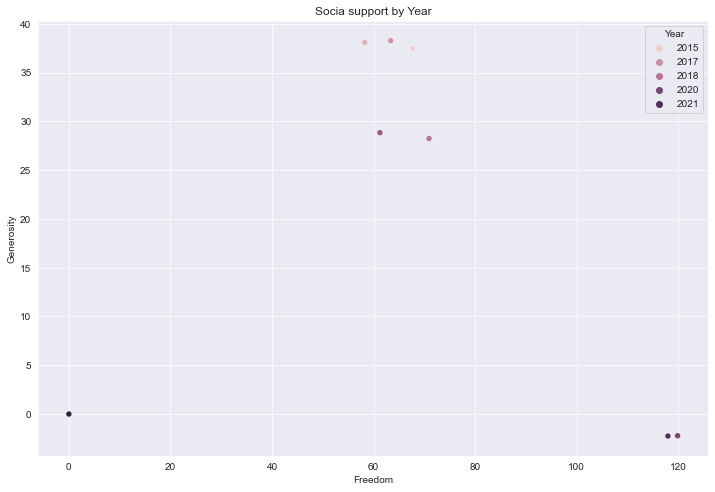

In [197]:
plt.figure(figsize=(12, 8))
plt.title('Socia support by Year')

r = sns.scatterplot(fgn["Freedom"],
               fgn["Generosity"],
                hue="Year",
                 data=fgn,
                sizes=3, markers='o');

In [198]:
sns.lineplot?

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


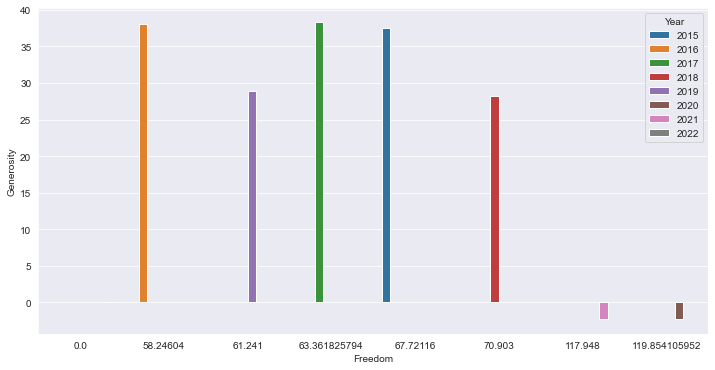

In [199]:
plt.figure(figsize=(12, 6))

sns.barplot(fgn["Freedom"],
           fgn["Generosity"],
           hue="Year",
           data=fgn);
# plt.plot(fgn["Freedom"], fgn["Generosity"], 'o--r');

In [200]:
# Region
r_free_gen = world_happiness_data.groupby(['Region'])[['Freedom', 'Generosity']].sum()

In [201]:
pd.DataFrame(r_free_gen)

,Freedom,Generosity
Region,,
Australia and New Zealand,2.440460,1.878710
Central and Eastern Europe,45.749717,6.283570
Commonwealth of Independent States,19.211046,-0.927417
East Asia,14.245790,2.010825
Latin America and Caribbean,55.357136,6.929683
Middle East and North Africa,37.373529,4.564490
North America,2.234340,1.718270
North America and ANZ,7.223182,1.136721
South Asia,15.821178,5.337711


In [202]:
rfg = r_free_gen.reset_index().sort_values(['Freedom', 'Generosity'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


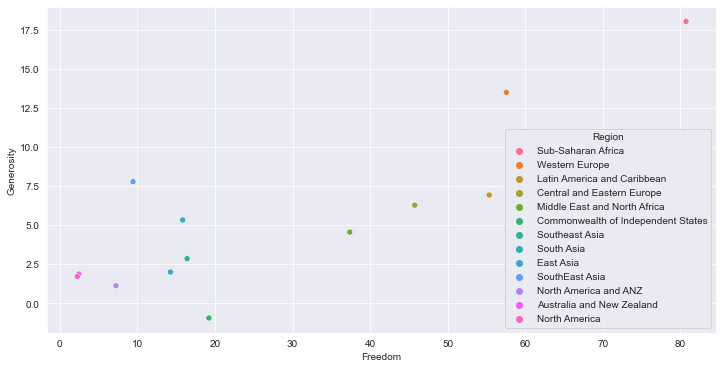

In [203]:
plt.figure(figsize=(12, 6))

sns.scatterplot(rfg["Freedom"],
           rfg["Generosity"],
           hue="Region",
           data=rfg);
# plt.plot(fgn["Freedom"], fgn["Generosity"], 'o--r');

In [204]:
# Generosity by country
c_free_gen = world_happiness_data.groupby(['Country'])[['Freedom', 'Generosity']].sum()

In [205]:
c_free_gen

,Freedom,Generosity
Country,,
Afghanistan,1.368193,1.140222
Albania,3.426483,0.767123
Algeria,1.838797,0.157991
Angola,0.109730,0.421076
Argentina,4.067232,0.084943
...,...,...
Venezuela,2.306825,-0.052161
Vietnam,4.765629,0.785785
Yemen,2.422794,0.179910


### Social Support vs Happiness Year, Region and Country

In [206]:
# Social Support compared to Happiness Score by Year
social = world_happiness_data.groupby(['Year'])[['Happiness Score', 'Social support']].sum()

In [207]:
pd.DataFrame(social)

,Happiness Score,Social support
Year,,
2015,849.366000,0.000000
2016,845.003000,0.000000
2017,829.873000,0.000000
2018,838.643000,189.265000
2019,843.507000,188.575000
2020,837.405699,123.734323
2021,824.393000,121.397000
2022,810.822000,0.000000


In [208]:
sb = social.reset_index().sort_values(['Happiness Score', 'Social support'], ascending=False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


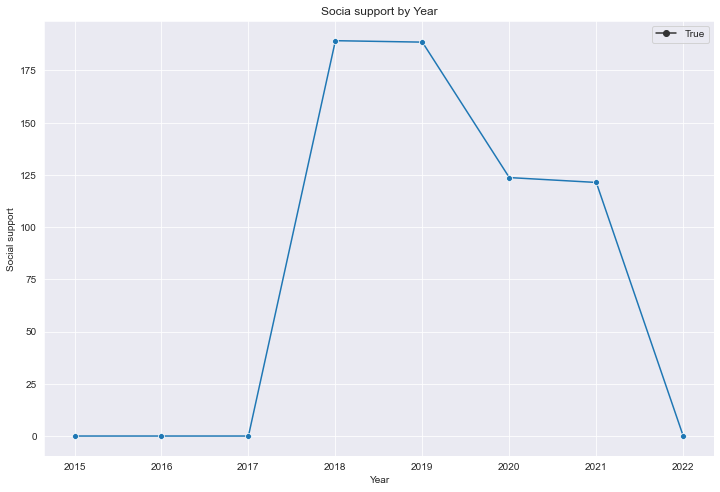

In [209]:
plt.figure(figsize=(12, 8))
plt.title('Socia support by Year')

r = sns.lineplot(sb['Year'], 
                sb['Social support'],
                 style=True,
                markers='o', sizes=10);

In [210]:
# Region
r_social = world_happiness_data.groupby(['Region'])[['Happiness Score', 'Social support']].sum()

In [211]:
pd.DataFrame(r_social)

,Happiness Score,Social support
Region,,
Australia and New Zealand,29.217000,0.000000
Central and Eastern Europe,512.170900,29.953627
Commonwealth of Independent States,129.904099,20.750744
East Asia,136.653100,10.322114
Latin America and Caribbean,525.403500,34.784712
Middle East and North Africa,388.070701,27.104236
North America,29.054000,0.000000
North America and ANZ,57.208100,7.469369
South Asia,126.430099,9.886971


In [212]:
rb = r_social.reset_index().sort_values(['Social support'], ascending=False)

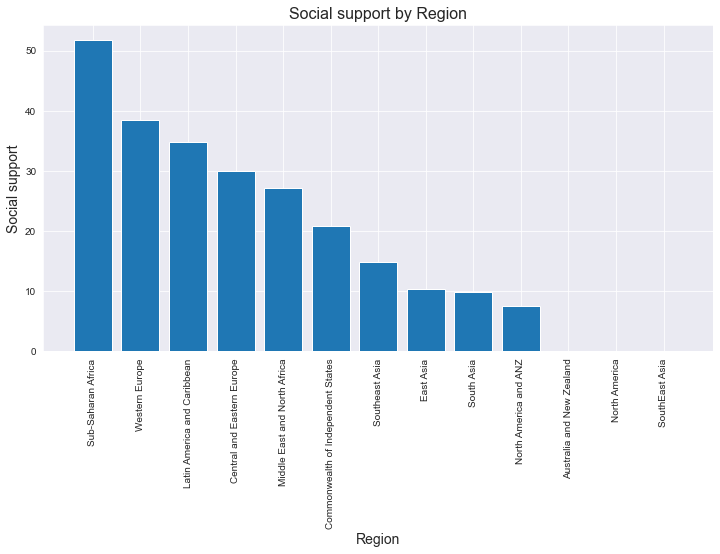

In [213]:
plt.figure(figsize=(12, 6))
plt.title('Social support by Region', size=16)
plt.xlabel('Region', size=14)
plt.ylabel('Social support', size=14)
plt.xticks(rotation=90)
plt.bar(rb['Region'], rb['Social support']);

In [214]:
# Percentage of Social Support compared to Happiness Score by region
r_score = (r_social['Happiness Score'] / r_social['Happiness Score'].sum() * 100)

In [215]:
r_support = (r_social['Social support'] / r_social['Social support'].sum() * 100)

In [216]:
r_social['% Social support'] = r_score + r_support

In [217]:
r_social

,Happiness Score,Social support,% Social support
Region,,,
Australia and New Zealand,29.217000,0.000000,0.870546
Central and Eastern Europe,512.170900,29.953627,27.480008
Commonwealth of Independent States,129.904099,20.750744,12.335762
East Asia,136.653100,10.322114,8.282551
Latin America and Caribbean,525.403500,34.784712,29.845100
Middle East and North Africa,388.070701,27.104236,22.619938
North America,29.054000,0.000000,0.865690
North America and ANZ,57.208100,7.469369,4.751655
South Asia,126.430099,9.886971,7.800433


In [218]:
# Country
# Percentage of Social Support compared to Happiness Score by Country
c_social = world_happiness_data.groupby(['Country'])[['Happiness Score', 'Social support']].sum()

In [219]:
s_score = (c_social['Happiness Score'] / c_social['Happiness Score'].sum() * 100)

In [220]:
s_social = (c_social['Social support'] / c_social['Social support'].sum() * 100)

In [221]:
c_social['% Social support'] = s_score + s_social

In [222]:
c_social

,Happiness Score,Social support,% Social support
Country,,,
Afghanistan,25.0579,1.987367,0.694188
Albania,38.7617,3.033070,1.067222
Algeria,43.3521,3.919385,1.278223
Angola,15.4890,1.125000,0.412492
Argentina,50.1677,4.698568,1.505343
...,...,...,...
Venezuela,42.5272,4.647408,1.382736
Vietnam,42.0225,4.410987,1.337229
Yemen,29.5114,3.885981,1.065634


### Perception of corruption and Trust(Government Corruption) compared to Happiness Score by Year, Region and Counrty

In [223]:
# Perception of corruption and Trust(Government Corruption) compared to Happiness Score by Year
corruption = world_happiness_data.groupby(['Year'])[['Happiness Score', 'Perceptions of corruption', 'Trust (Government Corruption)']].sum()

In [224]:
pd.DataFrame(corruption)

,Happiness Score,Perceptions of corruption,Trust (Government Corruption)
Year,,,
2015,849.366000,0.000000,22.660650
2016,845.003000,0.000000,21.606930
2017,829.873000,0.000000,19.083634
2018,838.643000,17.360000,0.000000
2019,843.507000,17.254000,0.000000
2020,837.405699,112.167394,0.000000
2021,824.393000,108.390000,0.000000
2022,810.822000,0.000000,0.000000


In [225]:
cp = corruption.reset_index().sort_values(['Perceptions of corruption', 'Trust (Government Corruption)'], ascending=False)

In [226]:
co = world_happiness_data.groupby(['Year'])[['Perceptions of corruption', 'Trust (Government Corruption)']].sum()
co

,Perceptions of corruption,Trust (Government Corruption)
Year,,
2015,0.000000,22.660650
2016,0.000000,21.606930
2017,0.000000,19.083634
2018,17.360000,0.000000
2019,17.254000,0.000000
2020,112.167394,0.000000
2021,108.390000,0.000000
2022,0.000000,0.000000


In [227]:
pd.DataFrame(co)
ch = co.reset_index().sort_values(['Year'], ascending=True)

<Figure size 864x432 with 0 Axes>

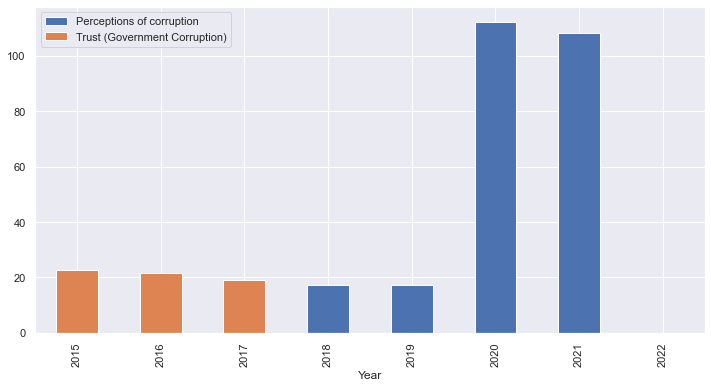

In [228]:
# cp.plot(kind='bar', x=cp['Year'],stacked=True)
sns.set()
# plt.xlabel('Year')
# plt.ylabel('Level of Corruption')
# plt.title('Corruption by Year')
plt.figure(figsize=(12, 6))

ch.set_index('Year').plot(kind='bar', stacked=True, figsize=(12,6));


<AxesSubplot:title={'center':'Level of Corruption'}, xlabel='Year', ylabel='Corruption'>

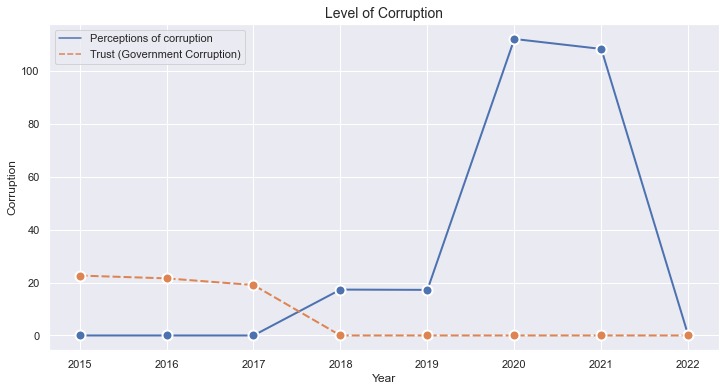

In [229]:
sns.set()
plt.figure(figsize=(12,6))
plt.ylabel('Corruption',size=12)
plt.xlabel('Year', size=12)
plt.title('Level of Corruption', size=14)
sns.lineplot(lw=2, ms=10, mew=2, data=co, marker='o')

In [230]:
r_cor = world_happiness_data.groupby(['Region'])[['Happiness Score', 'Perceptions of corruption', 'Trust (Government Corruption)']].sum()

In [231]:
# Region
r_corruption = world_happiness_data.groupby(['Region'])[['Perceptions of corruption', 'Trust (Government Corruption)']].sum()

In [232]:
pd.DataFrame(r_corruption)

,Perceptions of corruption,Trust (Government Corruption)
Region,,
Australia and New Zealand,0.000000,1.52794
Central and Eastern Europe,28.923598,5.06762
Commonwealth of Independent States,17.657645,0.00000
East Asia,8.313598,1.47625
Latin America and Caribbean,32.684050,5.12217
Middle East and North Africa,25.903662,6.70304
North America,0.000000,0.95044
North America and ANZ,3.523867,0.00000
South Asia,11.116590,1.45204


In [233]:
ro = r_cor.reset_index().sort_values(['Happiness Score', 'Perceptions of corruption', 'Trust (Government Corruption)'], ascending=False)

In [234]:
rc = r_corruption.reset_index().sort_values(['Perceptions of corruption', 'Trust (Government Corruption)'], ascending=False)

<Figure size 864x432 with 0 Axes>

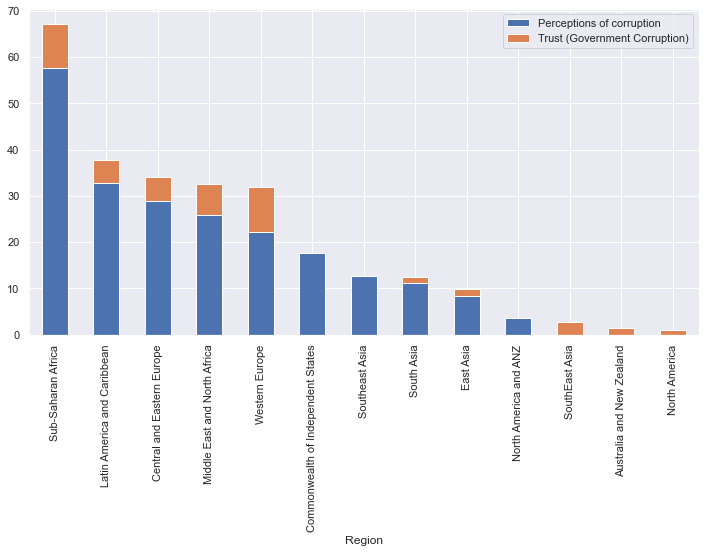

In [235]:
# cp.plot(kind='bar', x=cp['Year'],stacked=True)
sns.set()
# plt.xlabel('Year')
# plt.ylabel('Level of Corruption')
# plt.title('Corruption by Year')
plt.figure(figsize=(12, 6))

rc.set_index('Region').plot(kind='bar', stacked=True, figsize=(12,6));


In [236]:
# Percentage of Perceptions of corruption and Trust (Government Corruption) compared to Happiness Score by region
corr_score = (ro['Happiness Score'] / ro['Happiness Score'].sum() * 100)

In [237]:
corr_per = (r_corruption['Perceptions of corruption'] / r_corruption['Perceptions of corruption'].sum() * 100)

In [238]:
corr_gov = (r_corruption['Trust (Government Corruption)'] / r_corruption['Trust (Government Corruption)'].sum() * 100)

In [239]:
r_corruption['% Corruption'] = corr_score + corr_per + corr_gov

In [240]:
r_corruption

,Perceptions of corruption,Trust (Government Corruption),% Corruption
Region,,,
Australia and New Zealand,0.000000,1.52794,NaN
Central and Eastern Europe,28.923598,5.06762,NaN
Commonwealth of Independent States,17.657645,0.00000,NaN
East Asia,8.313598,1.47625,NaN
Latin America and Caribbean,32.684050,5.12217,NaN
Middle East and North Africa,25.903662,6.70304,NaN
North America,0.000000,0.95044,NaN
North America and ANZ,3.523867,0.00000,NaN
South Asia,11.116590,1.45204,NaN


In [241]:
# Country
# Percentage of Perceptions of corruption and Trust (Government Corruption) compared to Happiness Score by country
c_corruption = world_happiness_data.groupby(['Country'])[['Happiness Score', 'Perceptions of corruption', 'Trust (Government Corruption)']].sum()

In [242]:
cor_score = (c_corruption['Happiness Score'] / c_corruption['Happiness Score'].sum() * 100)

In [243]:
cor_per = (c_corruption['Perceptions of corruption'] / c_corruption['Perceptions of corruption'].sum() * 100)

In [244]:
cor_gov = (c_corruption['Trust (Government Corruption)'] / c_corruption['Trust (Government Corruption)'].sum() * 100)

In [245]:
c_corruption['% Corruption'] = cor_score + cor_per + cor_gov

In [246]:
c_corruption

,Happiness Score,Perceptions of corruption,Trust (Government Corruption),% Corruption
Country,,,,
Afghanistan,25.0579,1.918687,0.229468,1.489310
Albania,38.7617,1.856304,0.157004,1.555655
Algeria,43.3521,1.736485,0.481496,2.089639
Angola,15.4890,0.061000,0.225280,0.611416
Argentina,50.1677,1.780010,0.217540,1.792086
...,...,...,...,...
Venezuela,42.5272,1.763038,0.258221,1.735255
Vietnam,42.0225,1.744421,0.307603,1.798352
Yemen,29.5114,1.741288,0.194227,1.430840


In [247]:
# countries with happiness score of 6 or over
country_gdp = world_happiness_data[world_happiness_data['Happiness Score'] >= 6] 

In [248]:
country = country_gdp[['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Health']].sort_values(['Economy (GDP per Capita)', 'Health'], ascending=True).head(20)
country

,Country,Happiness Score,Economy (GDP per Capita),Health
43,Uzbekistan,6.003,0.632440,0.597720
510,Nicaragua,6.141,0.668000,0.700000
670,Nicaragua,6.105,0.694000,0.835000
513,Uzbekistan,6.096,0.719000,0.605000
357,Nicaragua,6.071,0.737299,0.653096
666,Uzbekistan,6.174,0.745000,0.756000
42,Guatemala,6.123,0.745530,0.644250
41,El Salvador,6.130,0.764540,0.677370
499,Guatemala,6.382,0.781000,0.608000
660,El Salvador,6.253,0.794000,0.789000


In [249]:
# 20 lowest gdp countries
e_gdp = country_gdp[['Country', 'Economy (GDP per Capita)']]

In [250]:
e = e_gdp.sort_values(['Economy (GDP per Capita)'], ascending=True).head(20)
e

,Country,Economy (GDP per Capita)
43,Uzbekistan,0.632440
510,Nicaragua,0.668000
670,Nicaragua,0.694000
513,Uzbekistan,0.719000
357,Nicaragua,0.737299
666,Uzbekistan,0.745000
42,Guatemala,0.745530
41,El Salvador,0.764540
499,Guatemala,0.781000
660,El Salvador,0.794000


In [251]:
# 20 lowest gdp countries
h_gdp = world_happiness_data[['Country', 'Health']]

In [252]:
h = h_gdp.sort_values(['Health'], ascending=True).head(20)
h

,Country,Health
268,Sierra Leone,0.000000
453,Lesotho,0.000000
122,Sierra Leone,0.000000
582,Sierra Leone,0.000000
760,Swaziland,0.000000
420,Sierra Leone,0.005565
624,Central African Republic,0.010000
469,Central African Republic,0.018773
301,Chad,0.038240
451,Chad,0.041135


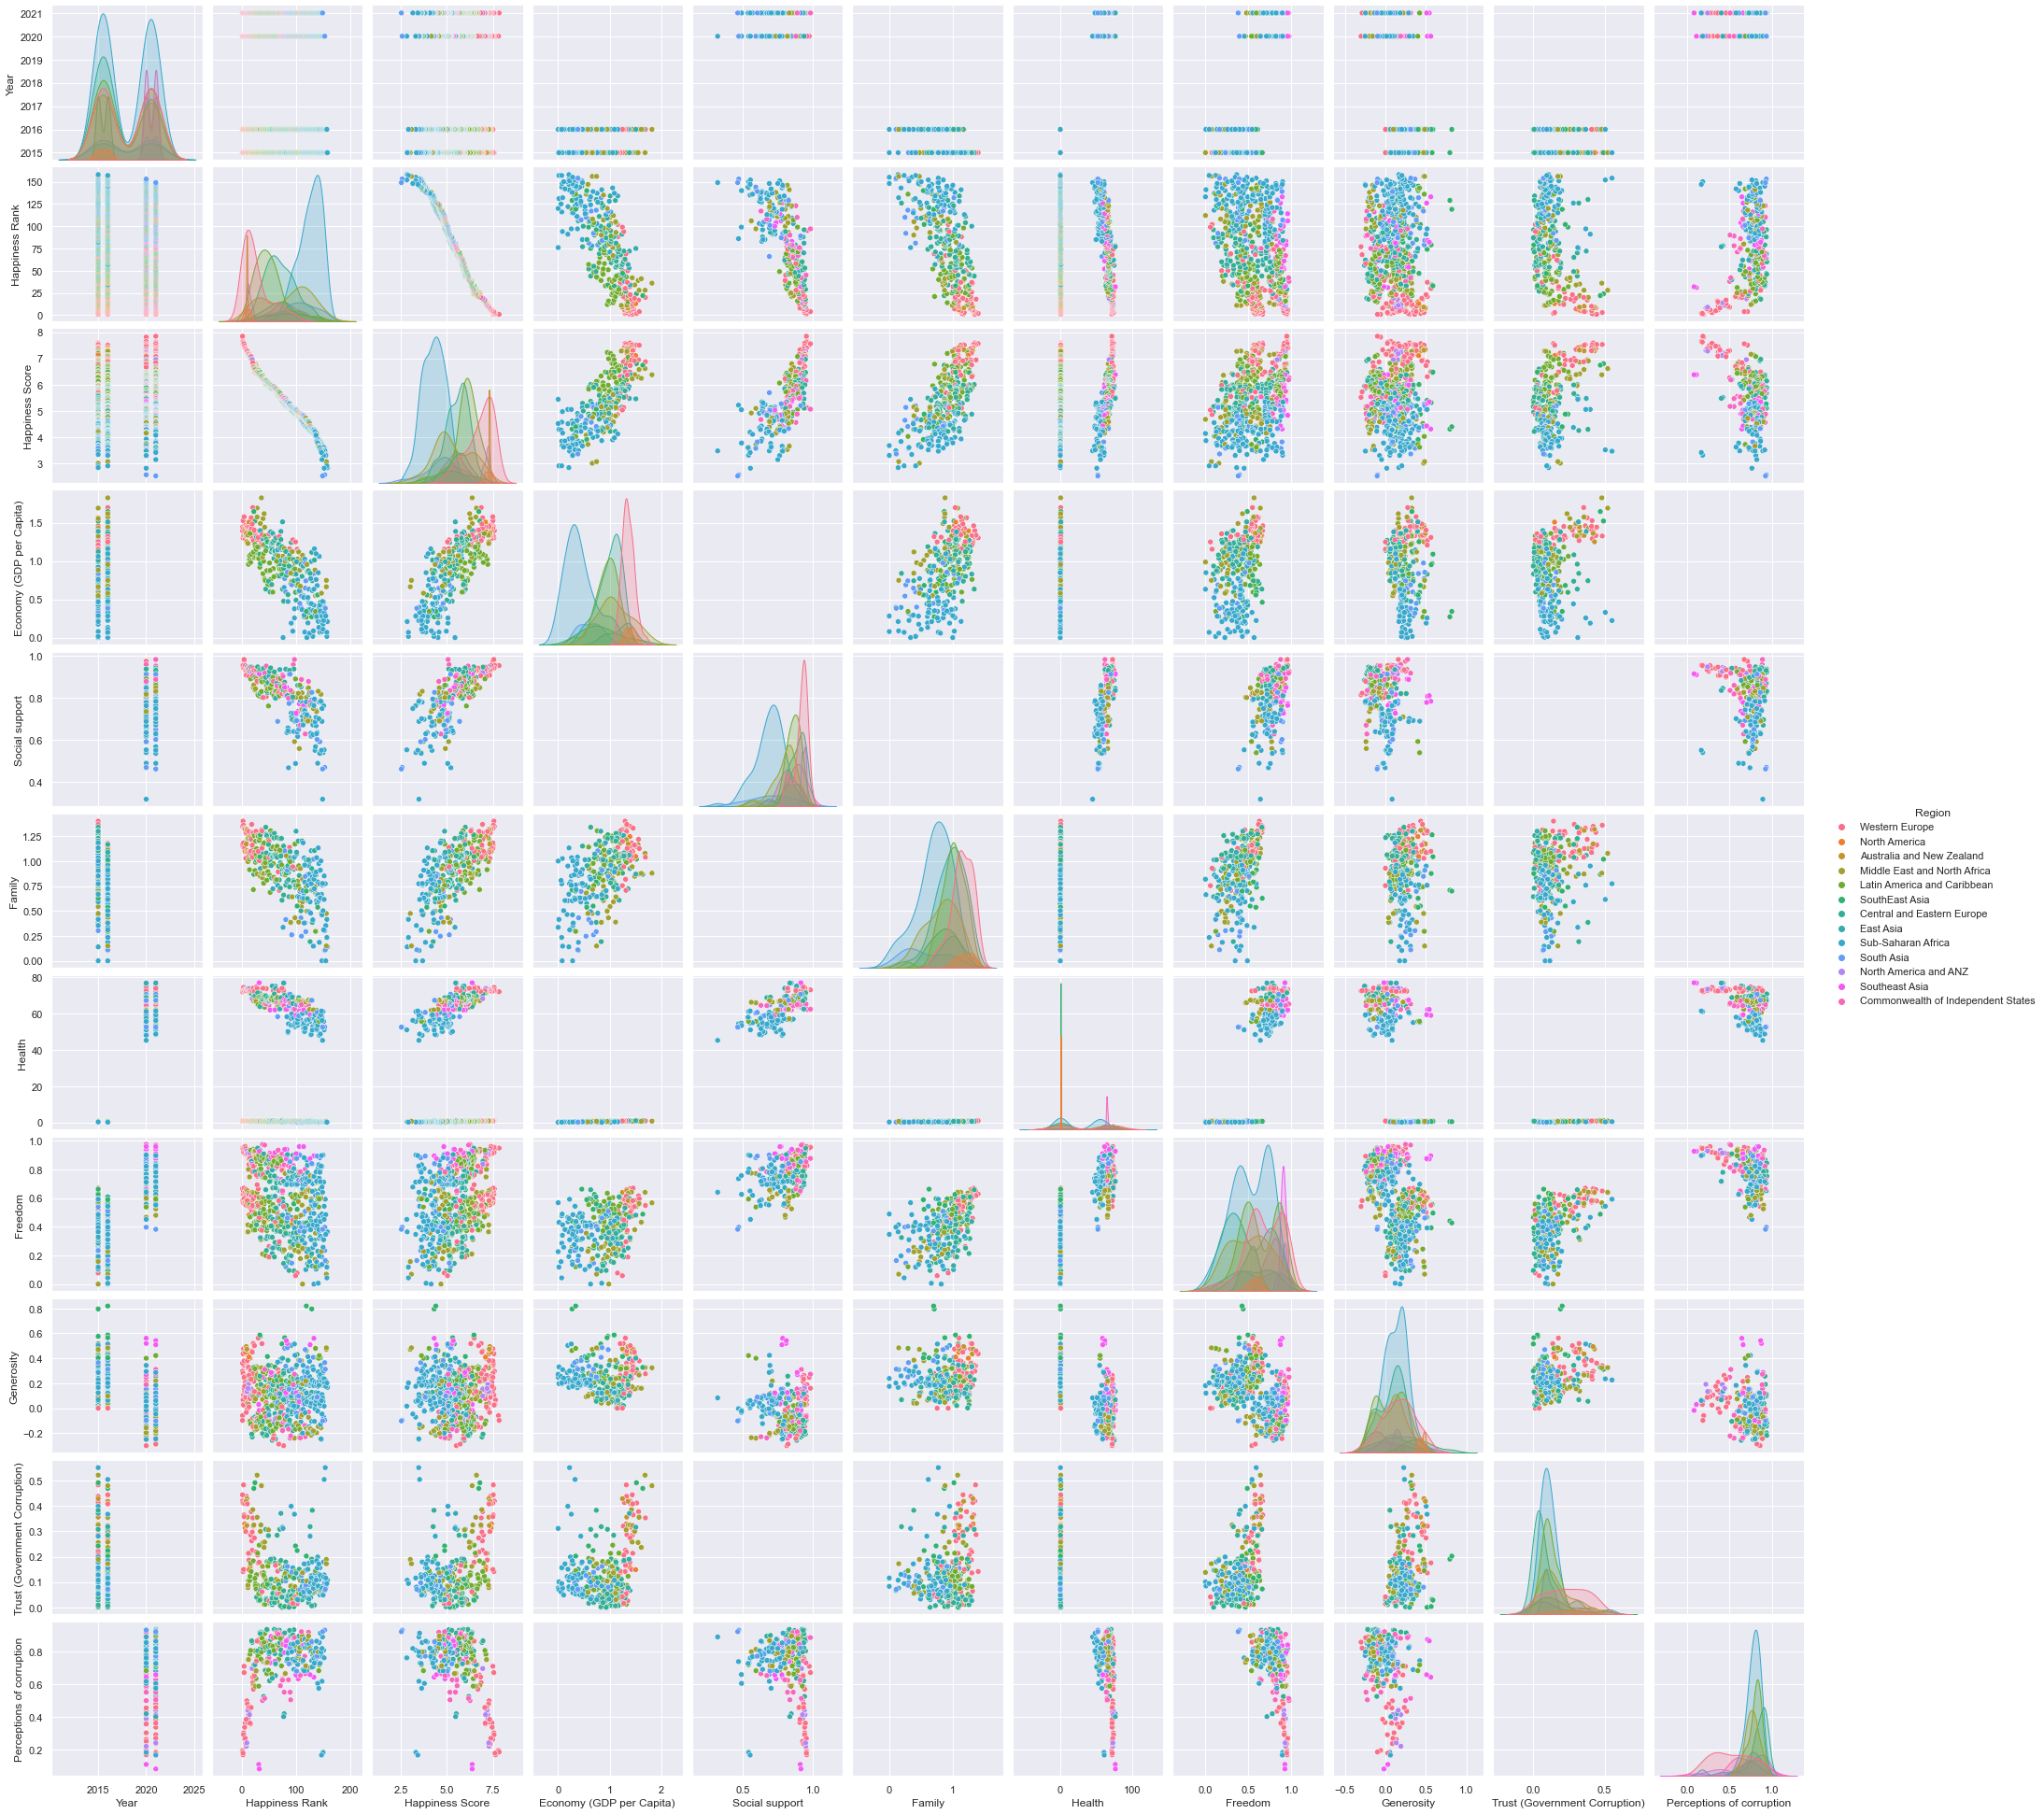

In [253]:
sns.pairplot(world_happiness_data, hue='Region');